# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



## An analysis/description of which questions are most crucial concerning their placement on the axes.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_excel("alldata.xlsx")
exclude_columns = ['navn', 'parti', 'storkreds', 'alder']
question_columns = [col for col in df.columns if col not in exclude_columns]

X = df[question_columns].copy()
X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  #Is 2 for 2D visualization
principal_components = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(
    pca.components_.T,
    index=question_columns,
    columns=['PC1', 'PC2']
)

#Sort questions by absolute influence on PC1 and PC2
important_PC1 = loadings['PC1'].abs().sort_values(ascending=False)
important_PC2 = loadings['PC2'].abs().sort_values(ascending=False)

print("Top questions influencing Axis 1 (PC1):")
print(important_PC1.head(10))

print("\nTop questions influencing Axis 2 (PC2):")
print(important_PC2.head(10))

#PCA looks at how the answers vary across all candidates and finds the directions (principal components) that capture the most variance. The loadings (or weights) show how much each question contributes to those directions.”
#The way the questions are grouped are by finding a tendency between the answers and the candidates.

Top questions influencing Axis 1 (PC1):
530    0.190641
537    0.190284
4a     0.188849
3b     0.188778
550    0.188555
531    0.187016
543    0.185893
548    0.176281
559    0.176279
540    0.174404
Name: PC1, dtype: float64

Top questions influencing Axis 2 (PC2):
10b    0.302918
556    0.297979
551    0.293836
553    0.272808
4b     0.258449
5a     0.228295
6a     0.208142
6b     0.207708
555    0.206750
534    0.201447
Name: PC2, dtype: float64


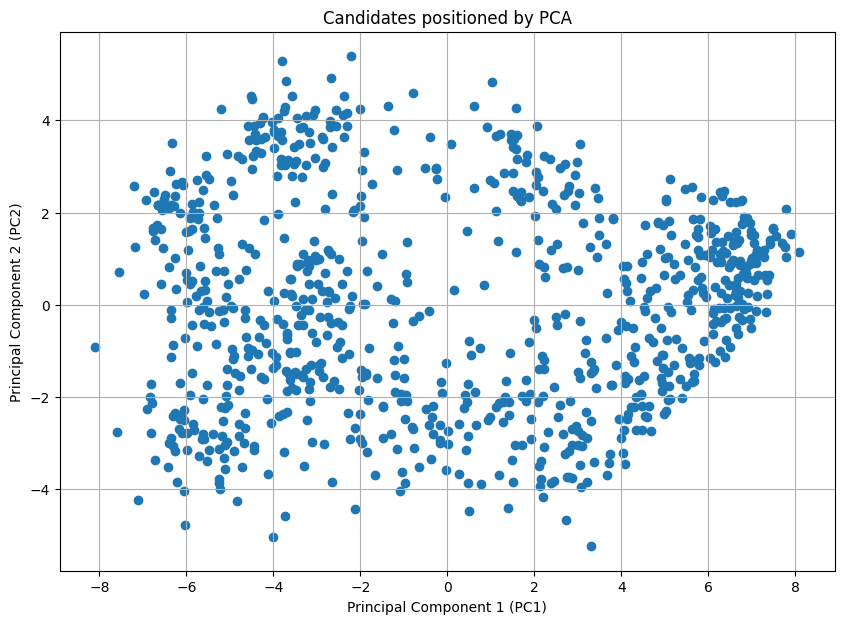

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

plt.title("Candidates positioned by PCA")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.grid(True)
plt.show()

#The scatter plot visualizes the candidates in the new PCA space. Each point represents a candidate, and their position is determined by their responses to the questions and the weight/loading from the result above.
#The range on PC1 is larger than on PC2 dispite the top values in PC2 having larger weights, this is there are fewer dominant features resulting in more concentrated distribution of values on PC2.
#If the candidates have answered stongly agree on the loading of PC1, most will be acummilated and be pushed furthere positive alongt the PC1 axis.

## Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.

Average answers per party:
                                                  530       531       533  \
parti                                                                       
Alternativet                                 1.880597  1.134328 -1.895522   
Danmarksdemokraterne                        -0.837838 -1.378378  1.513514   
Dansk Folkeparti                            -0.571429 -1.081633  1.551020   
Det Konservative Folkeparti                 -0.836735 -1.877551  0.948980   
Enhedslisten                                 1.959459  1.864865 -1.918919   
Frie Grønne, Danmarks Nye Venstrefløjsparti  1.923077  1.923077 -2.000000   
Kristendemokraterne                          0.880952 -0.666667 -1.285714   
Liberal Alliance                            -1.142857 -1.971429 -0.857143   
Løsgænger                                    0.000000 -0.666667 -0.333333   
Moderaterne                                  0.642857  0.904762 -0.285714   
Nye Borgerlige                              -1.09

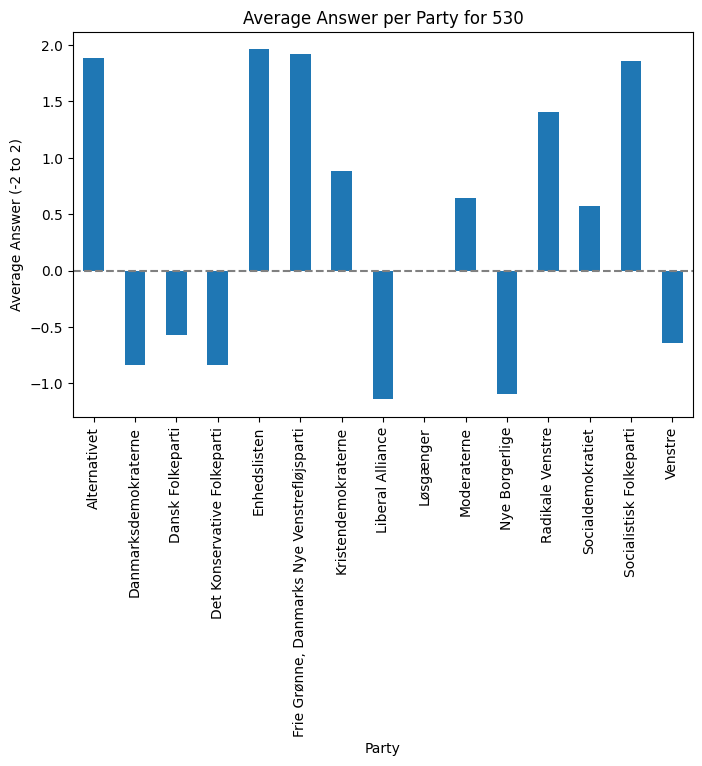

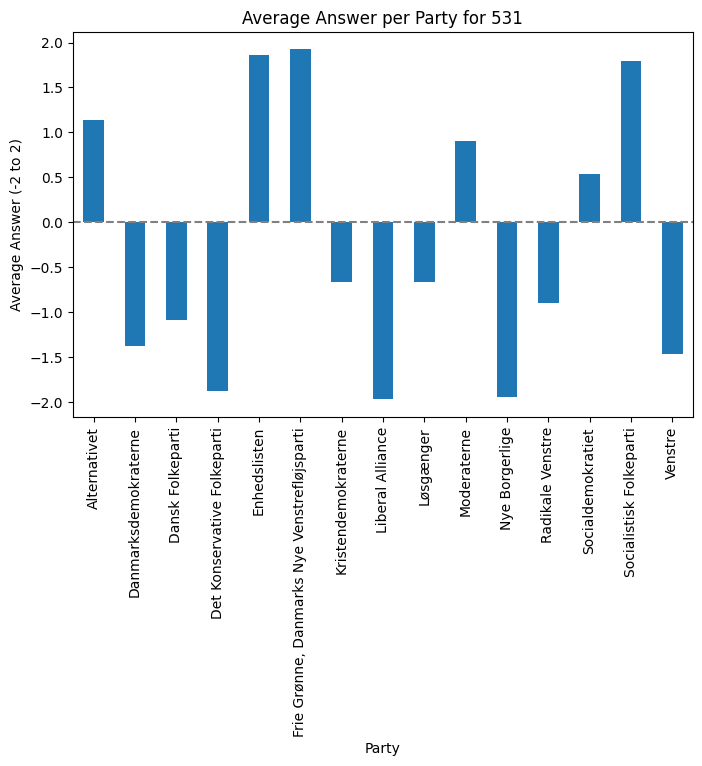

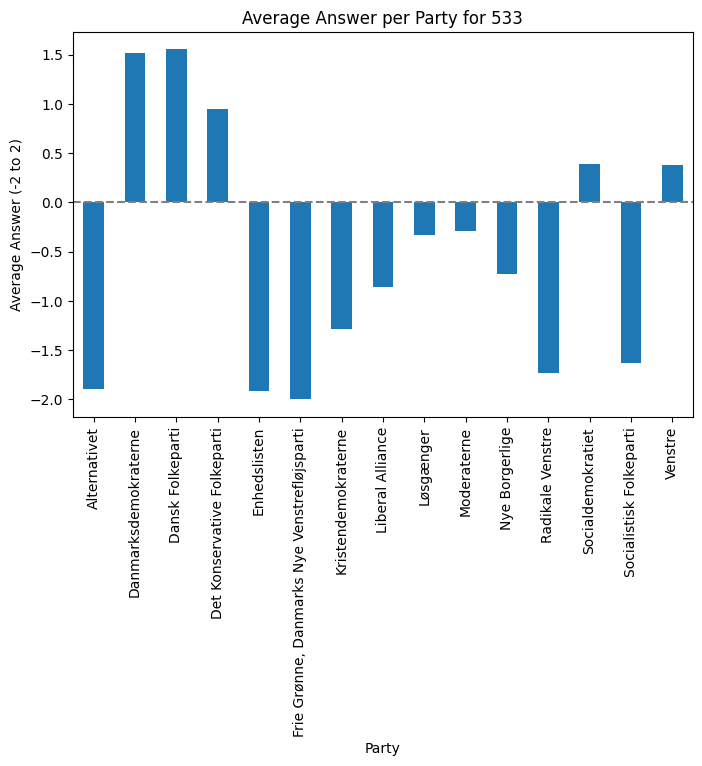

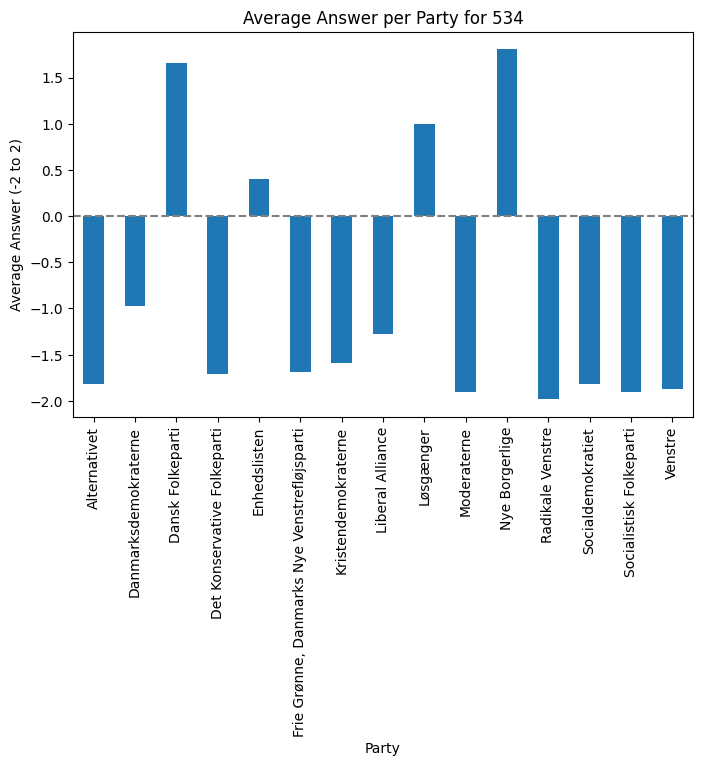

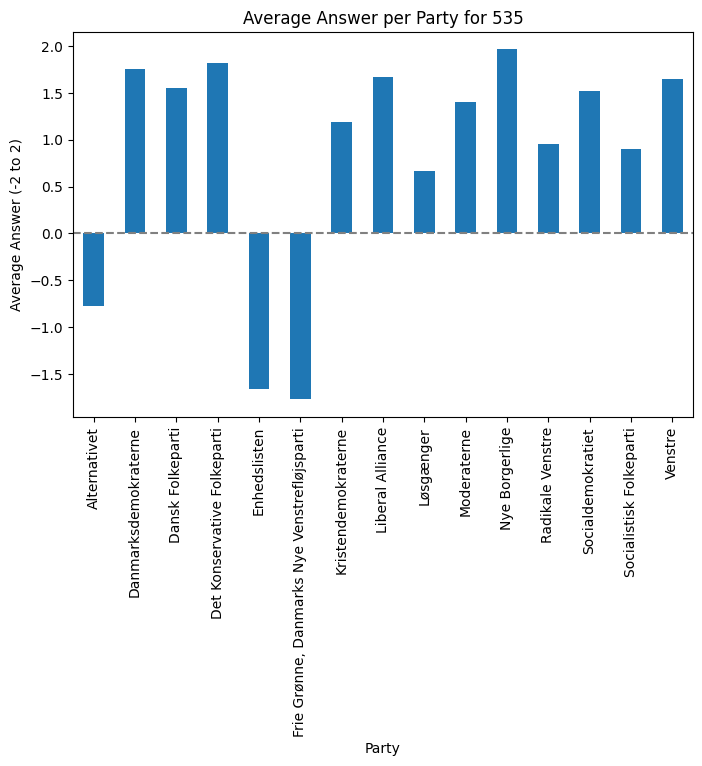

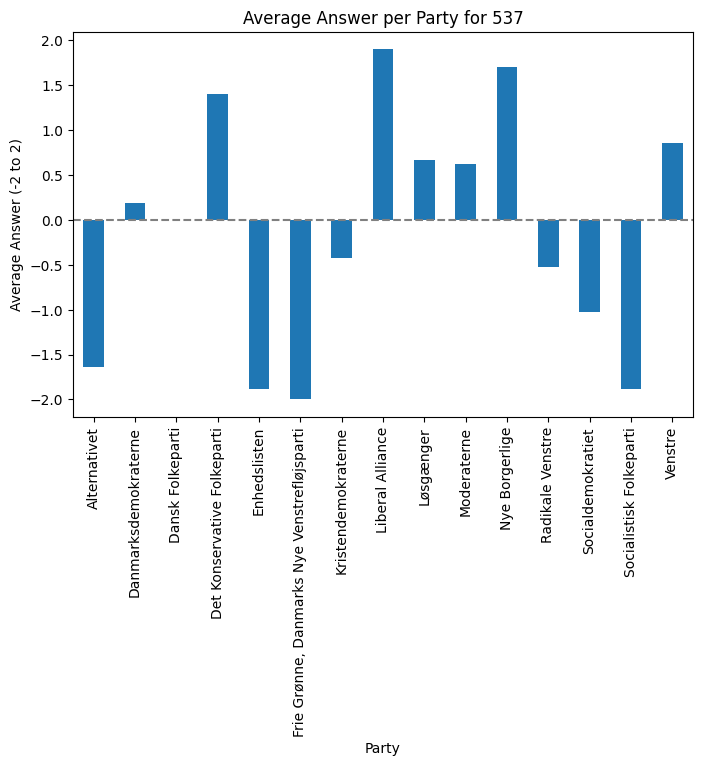

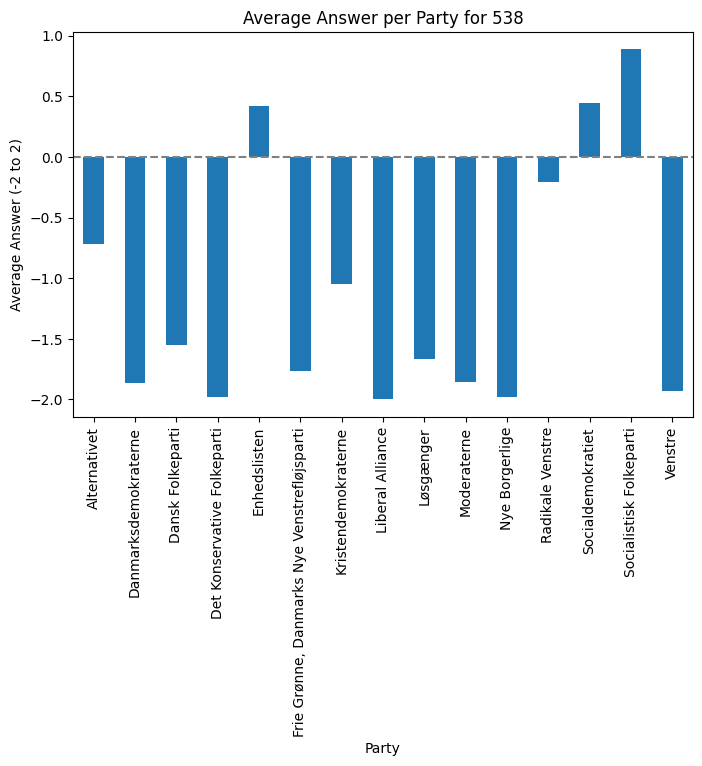

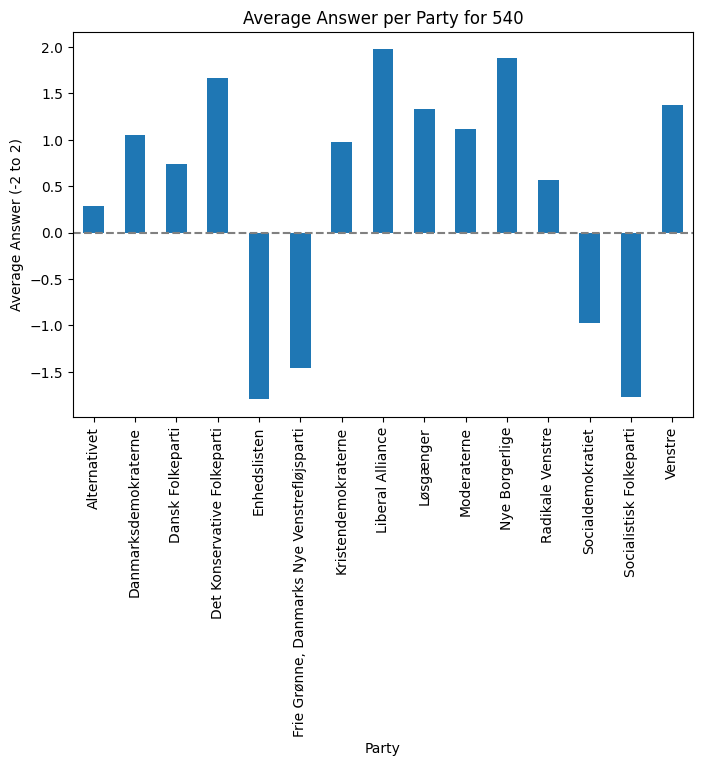

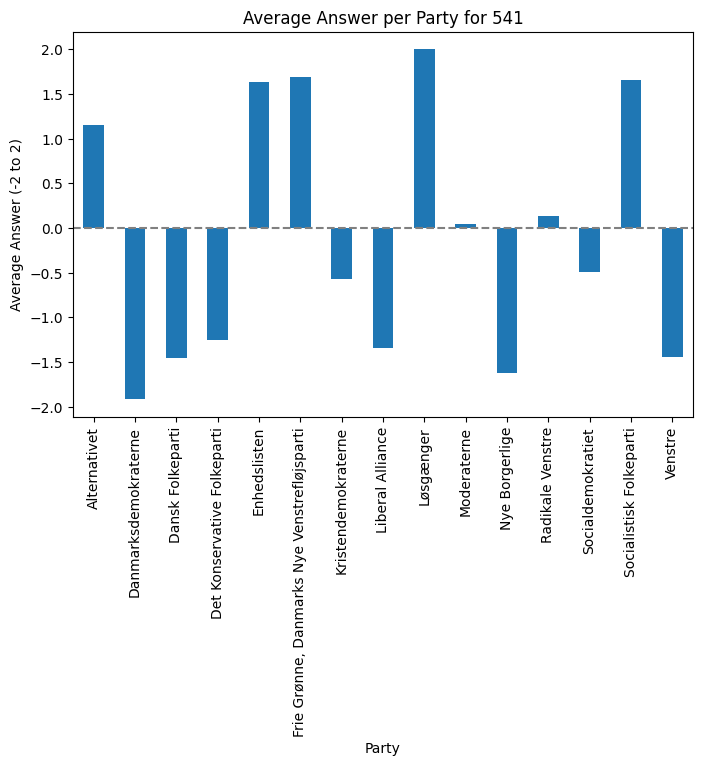

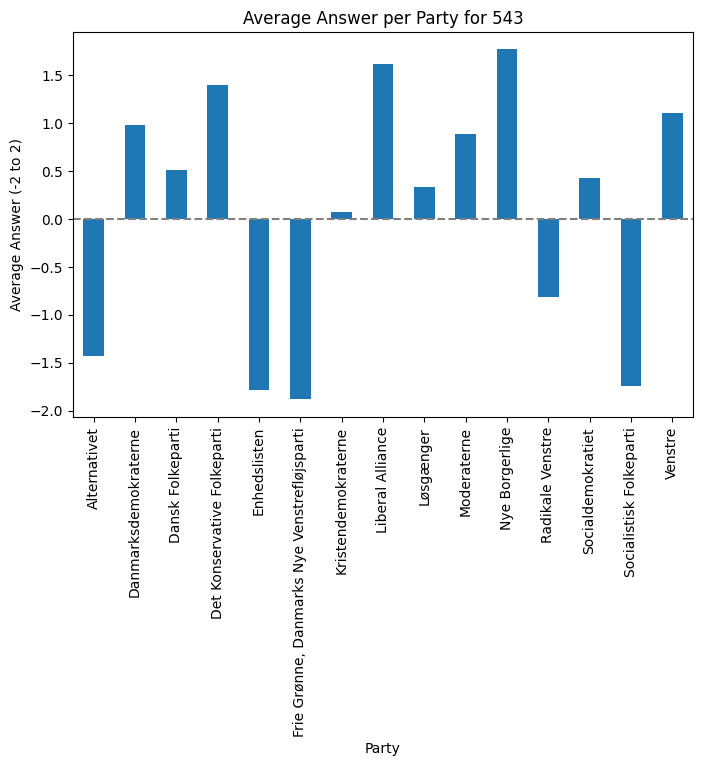

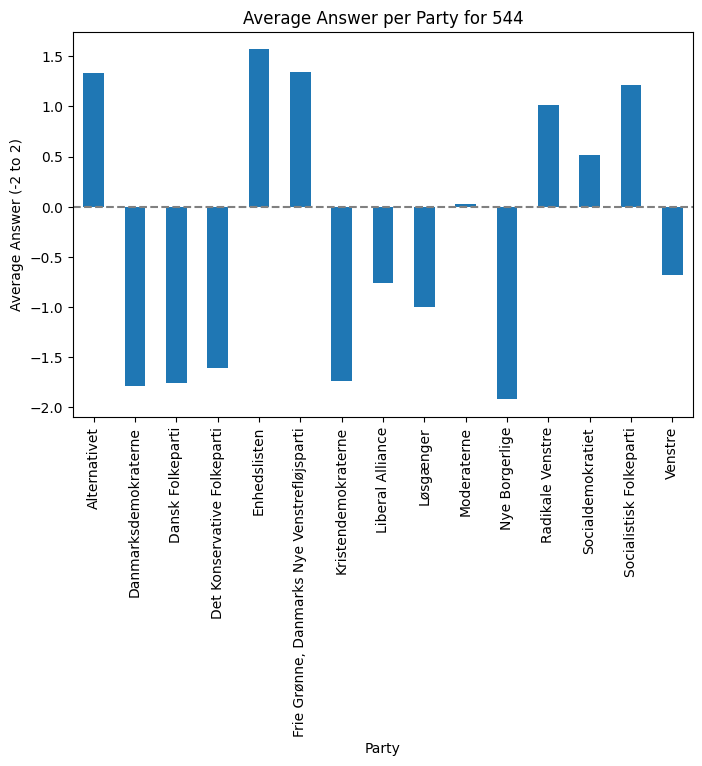

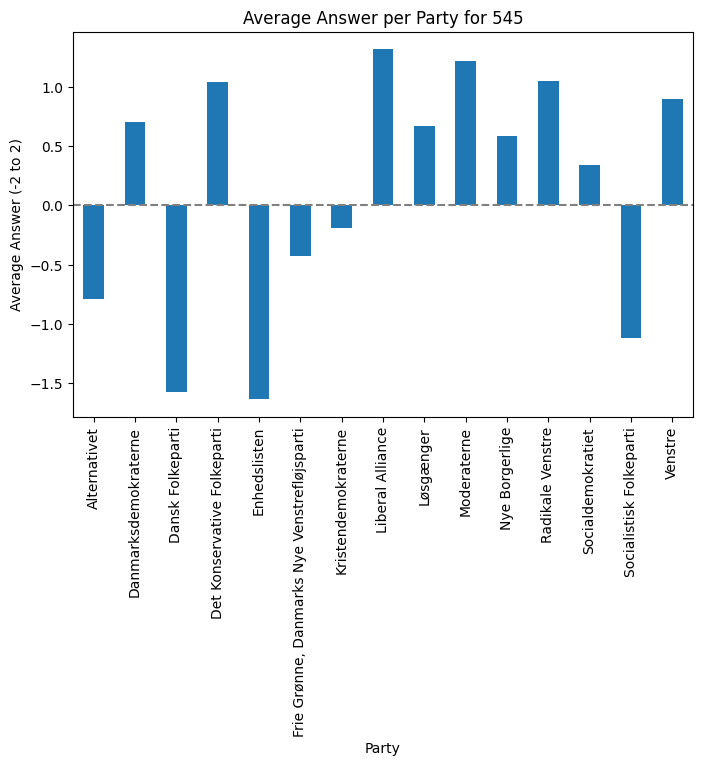

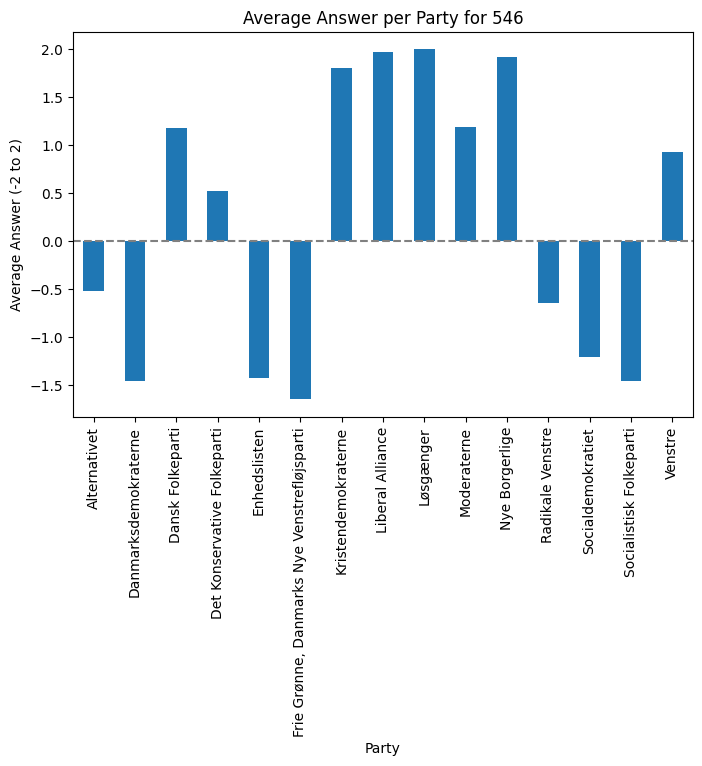

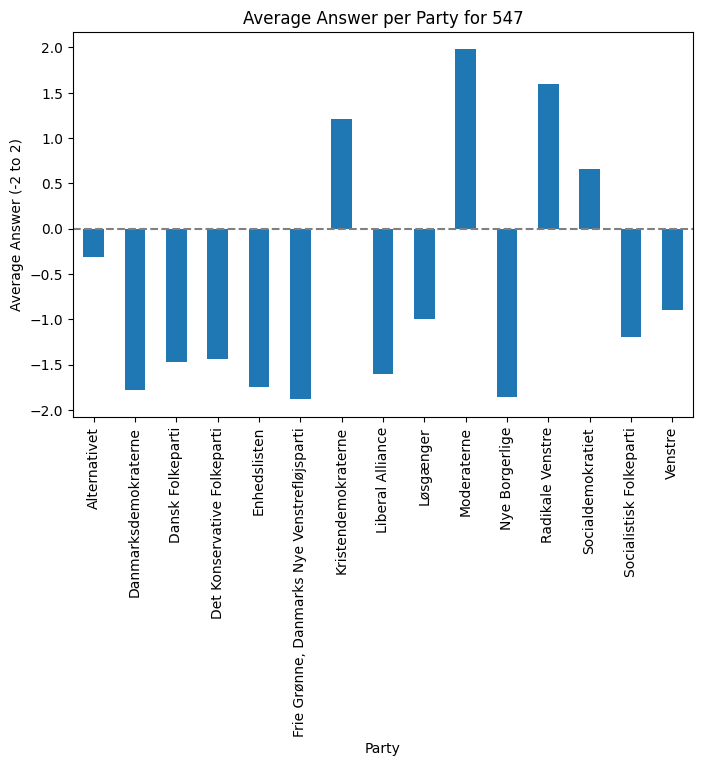

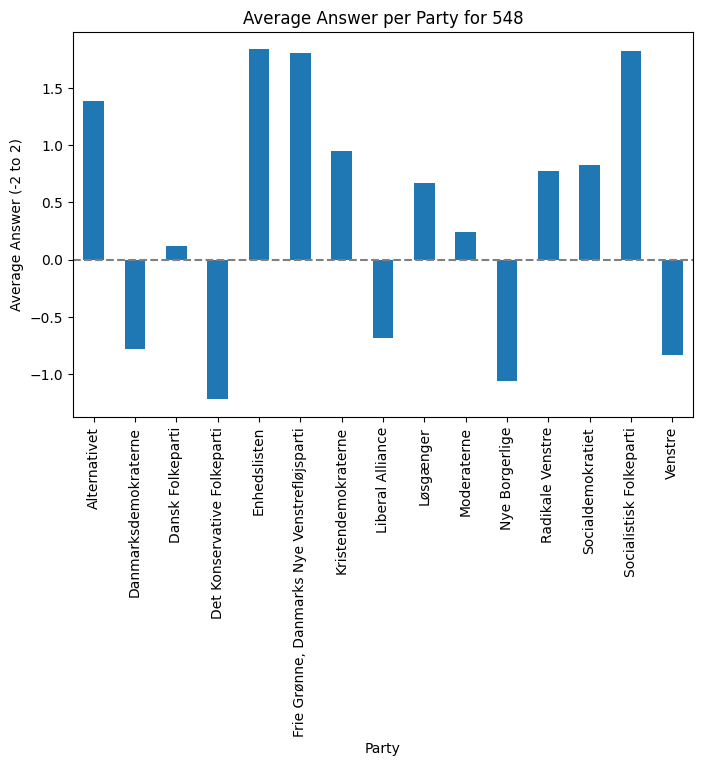

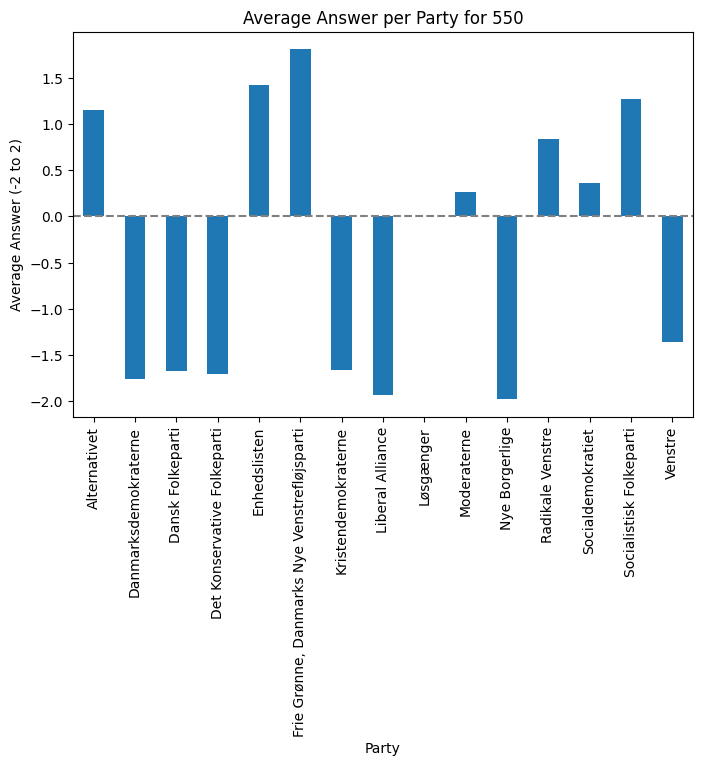

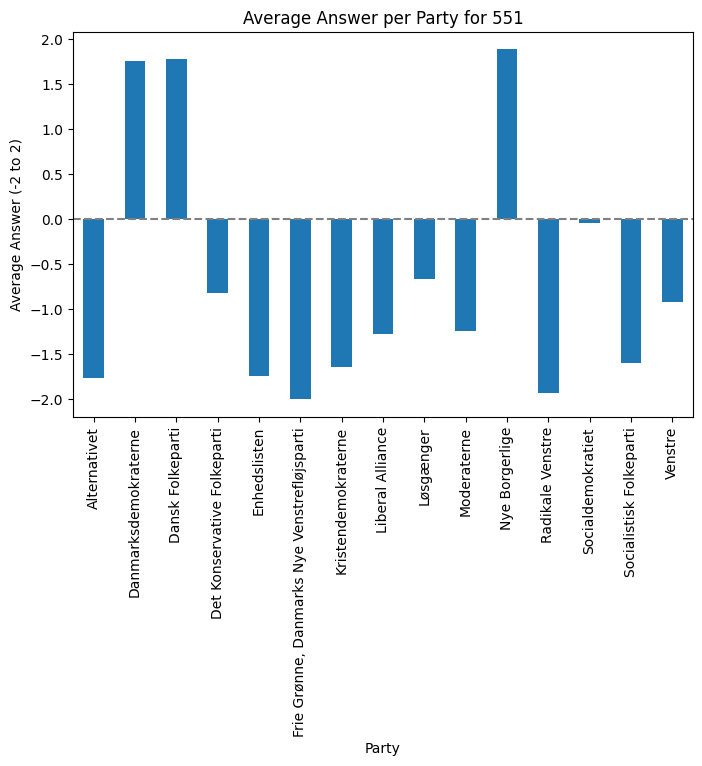

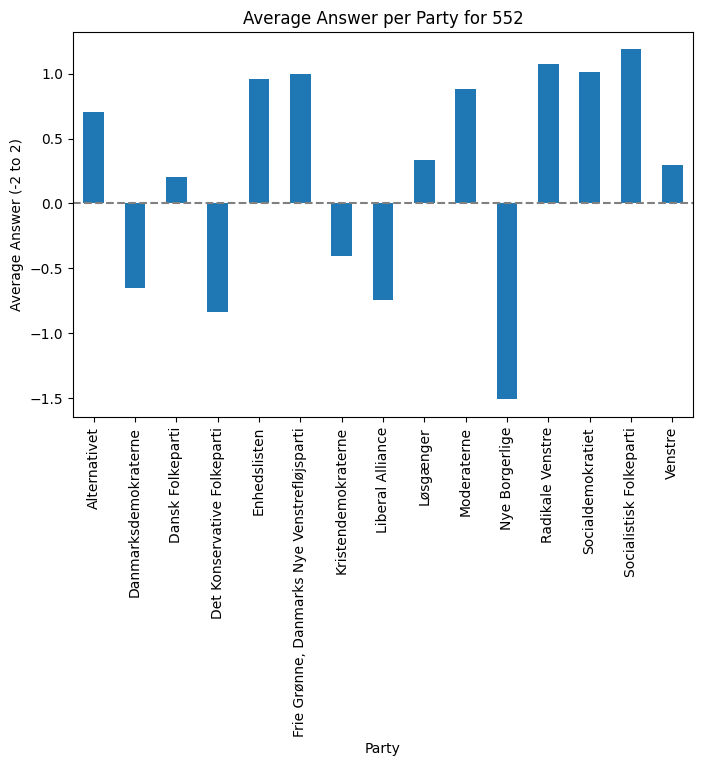

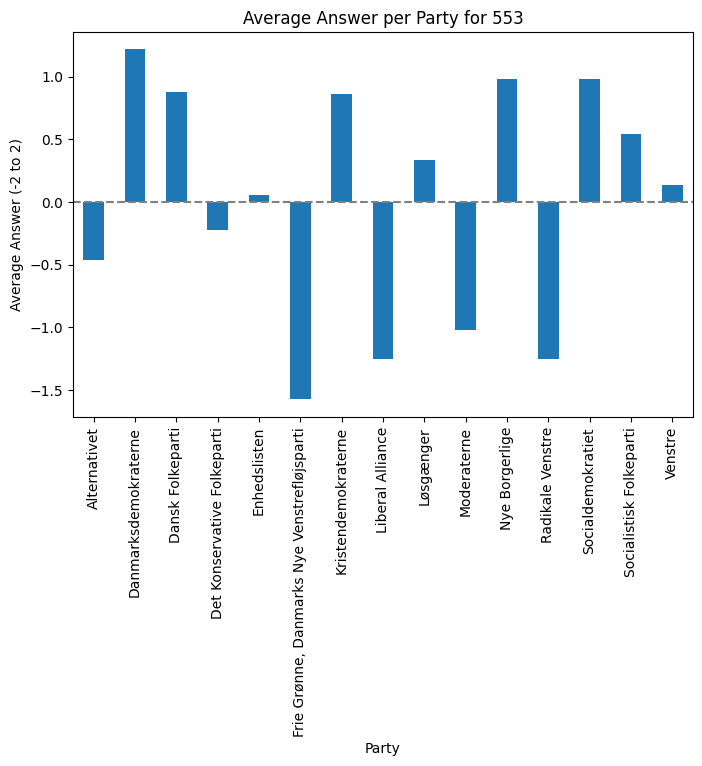

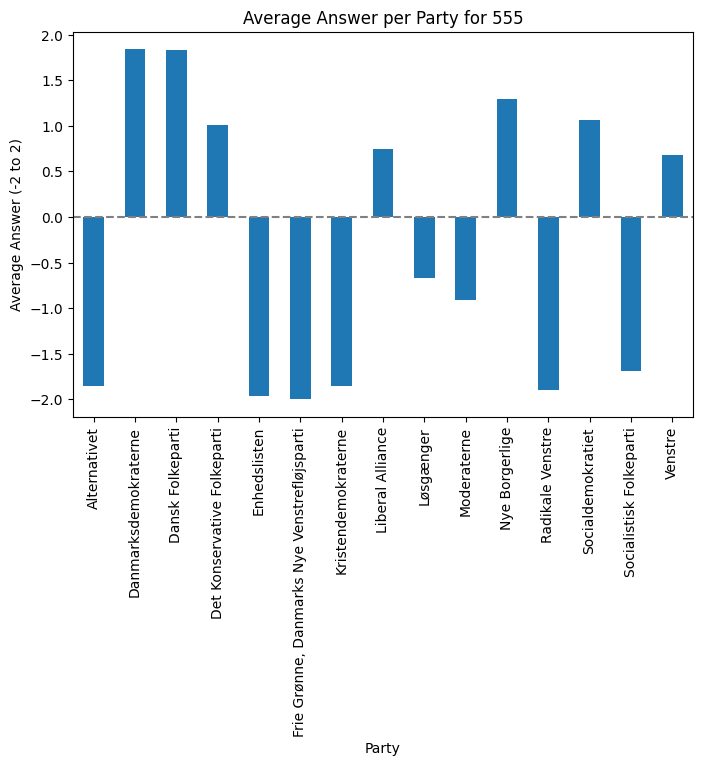

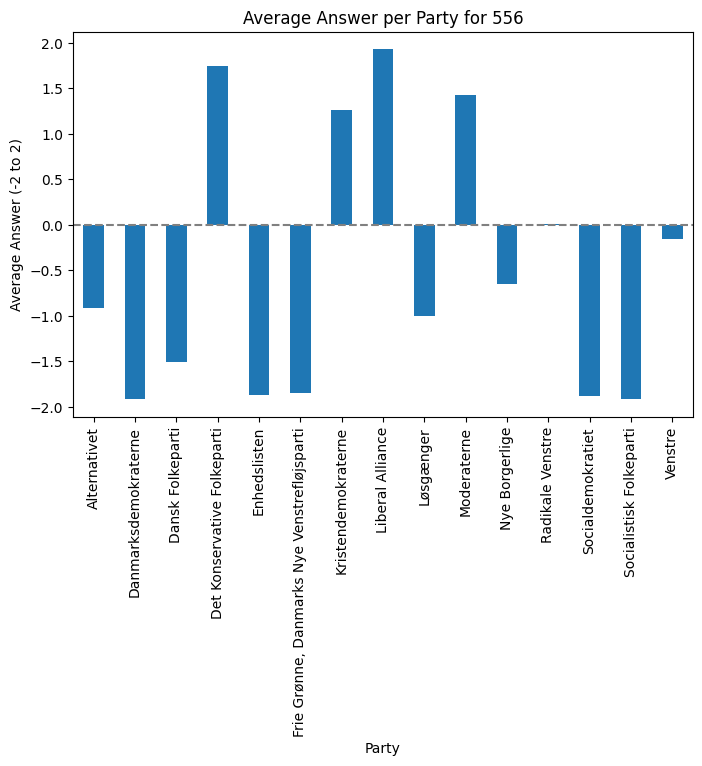

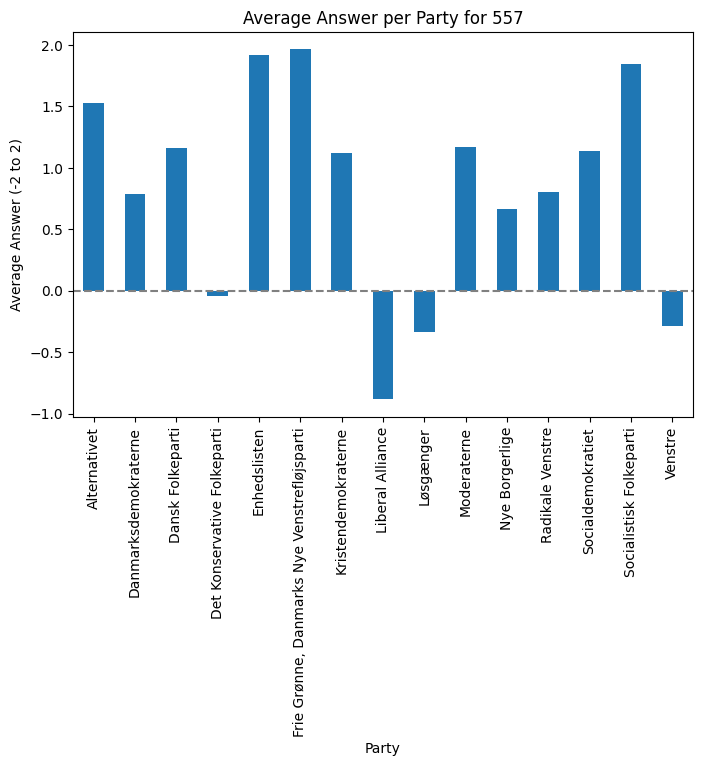

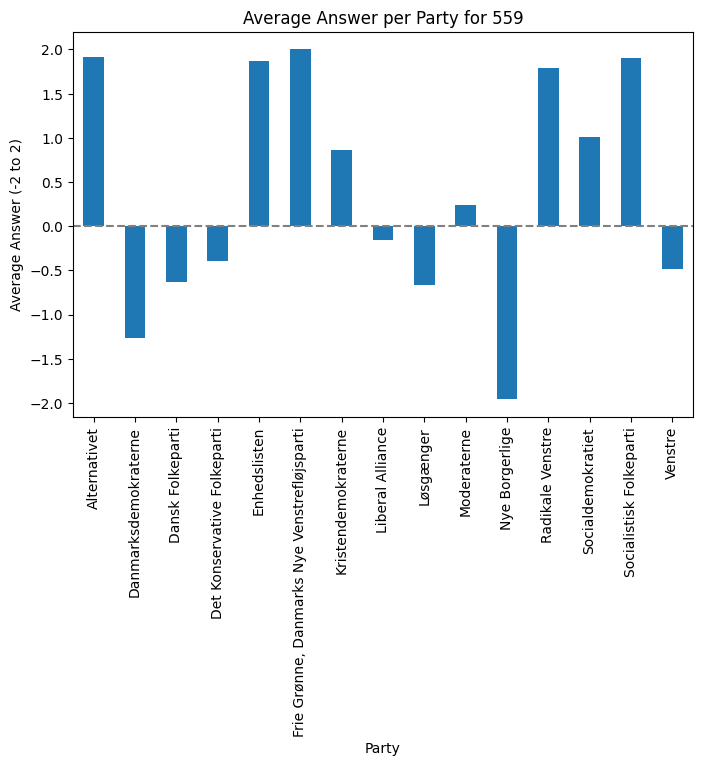

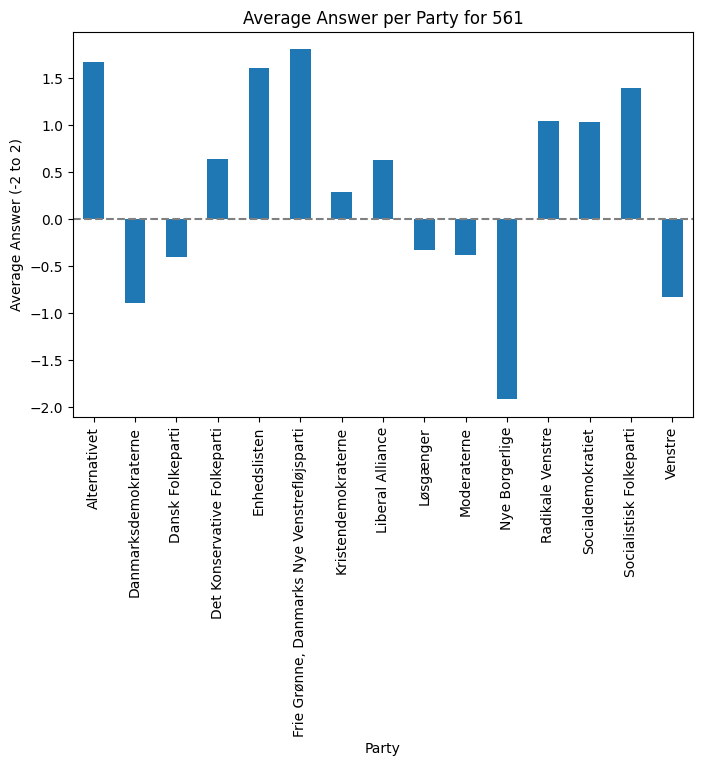

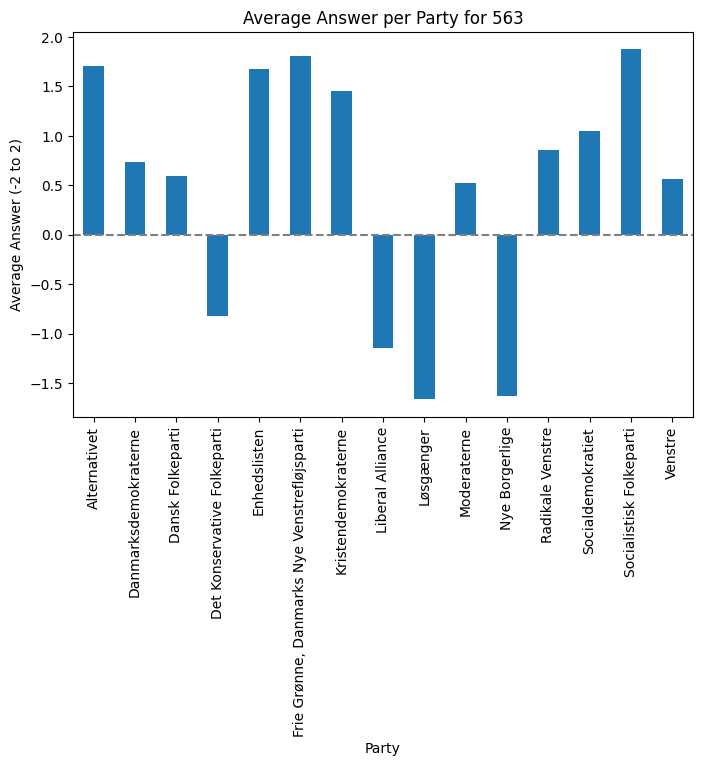

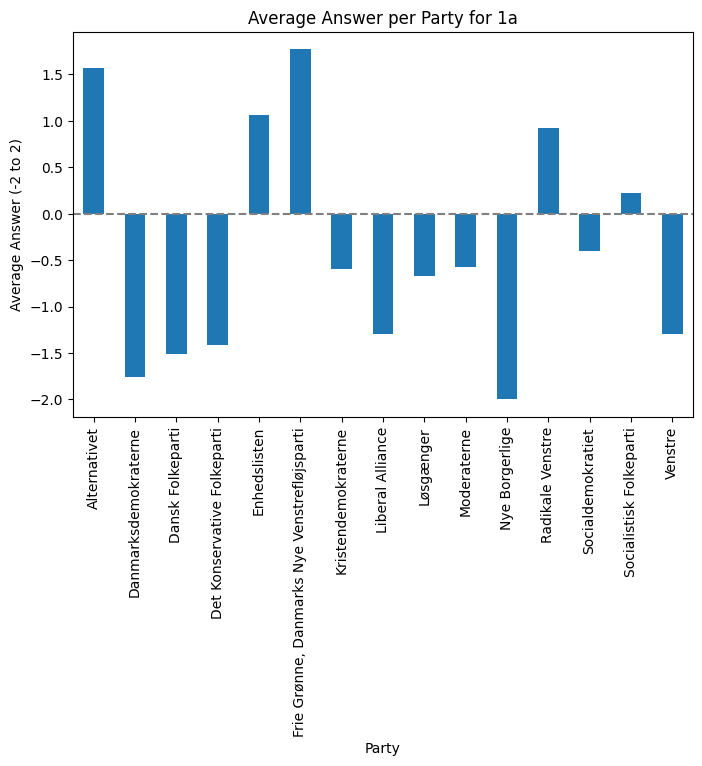

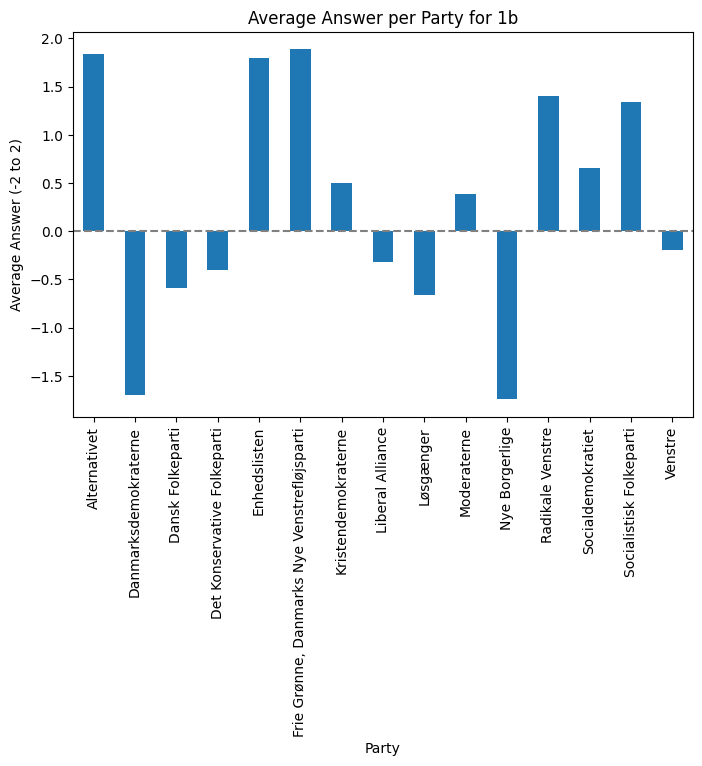

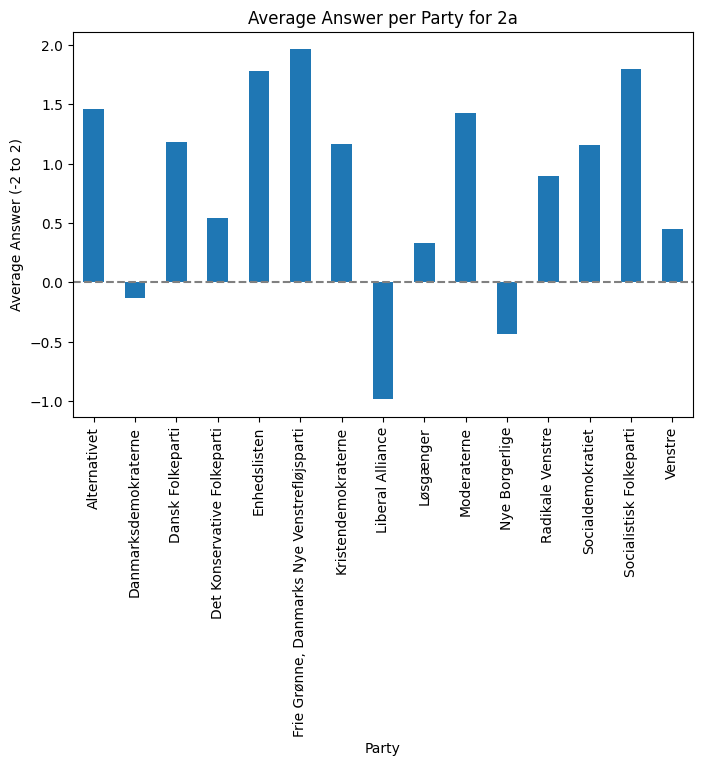

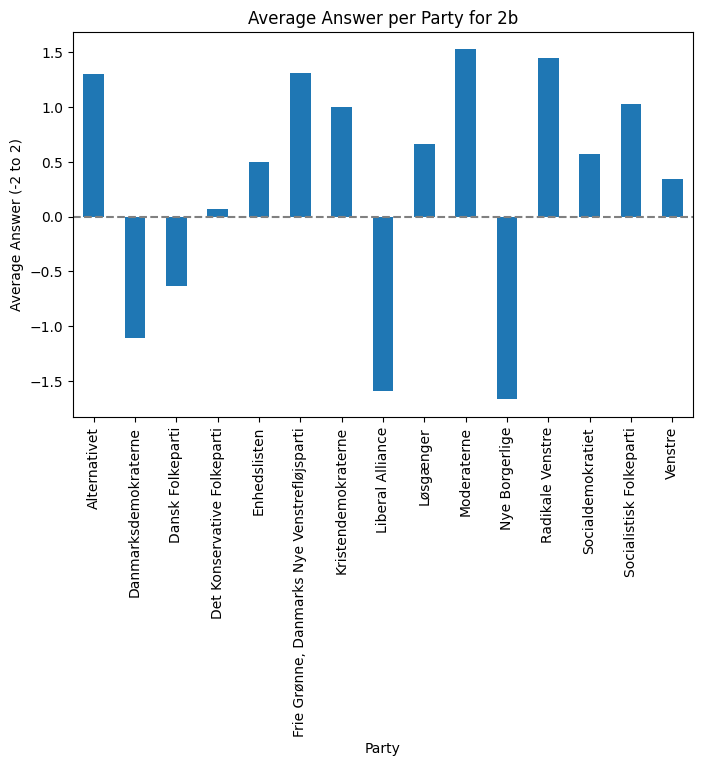

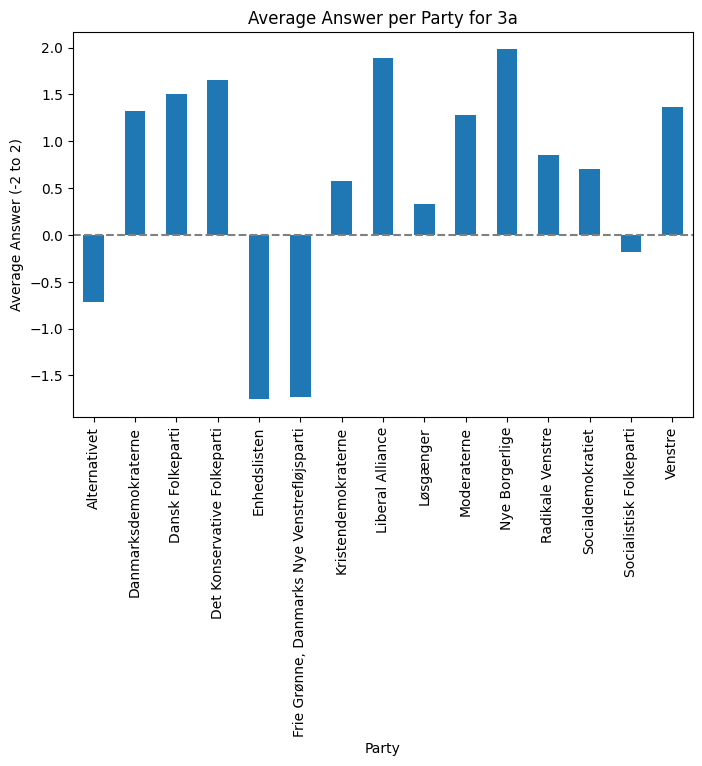

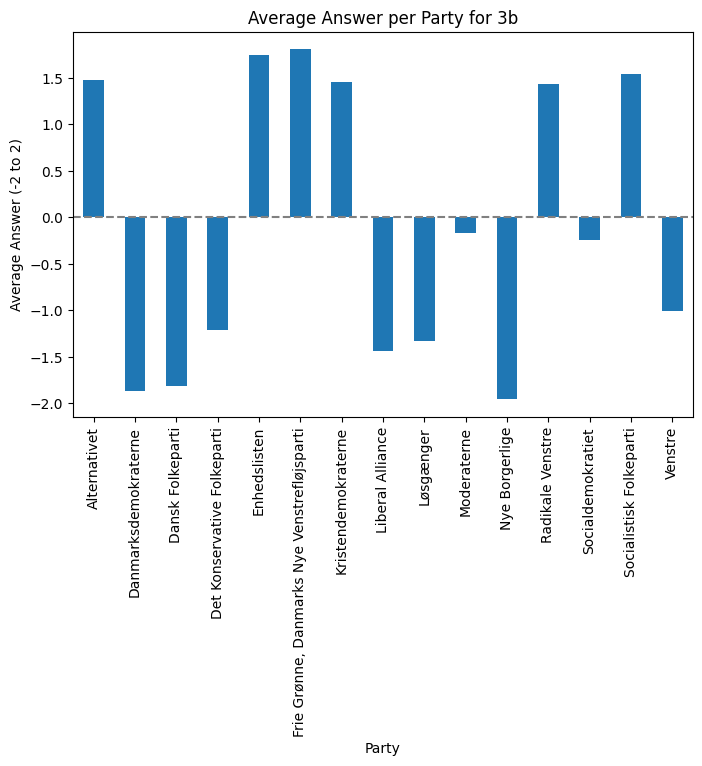

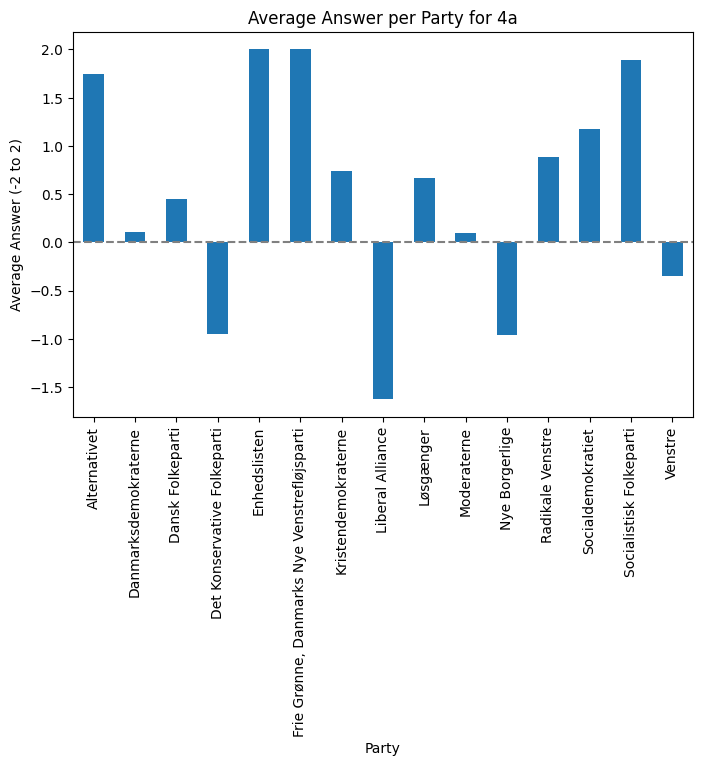

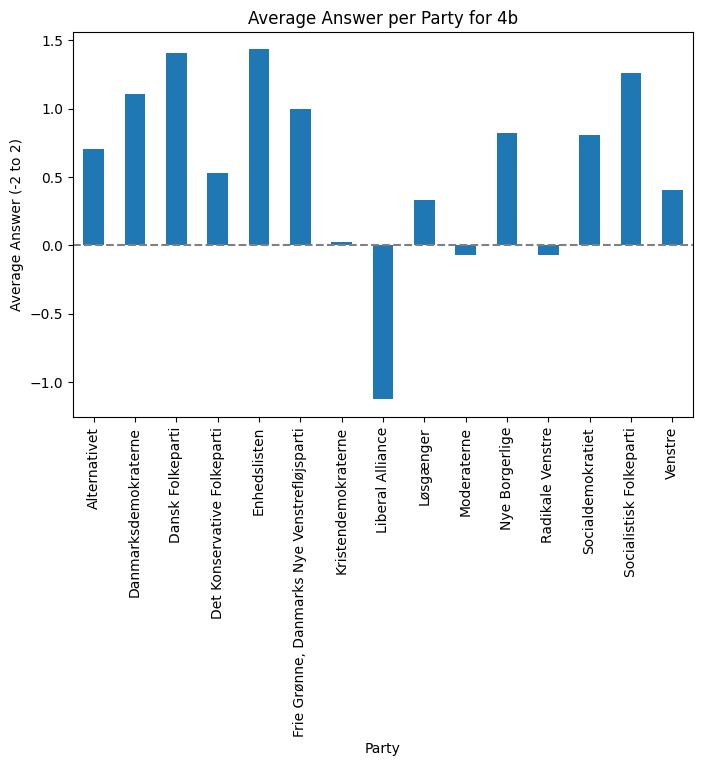

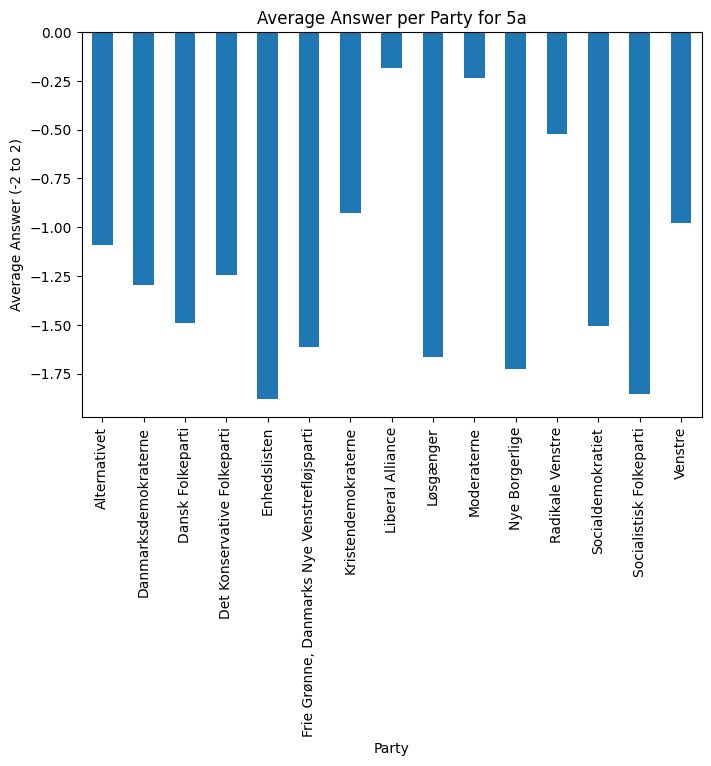

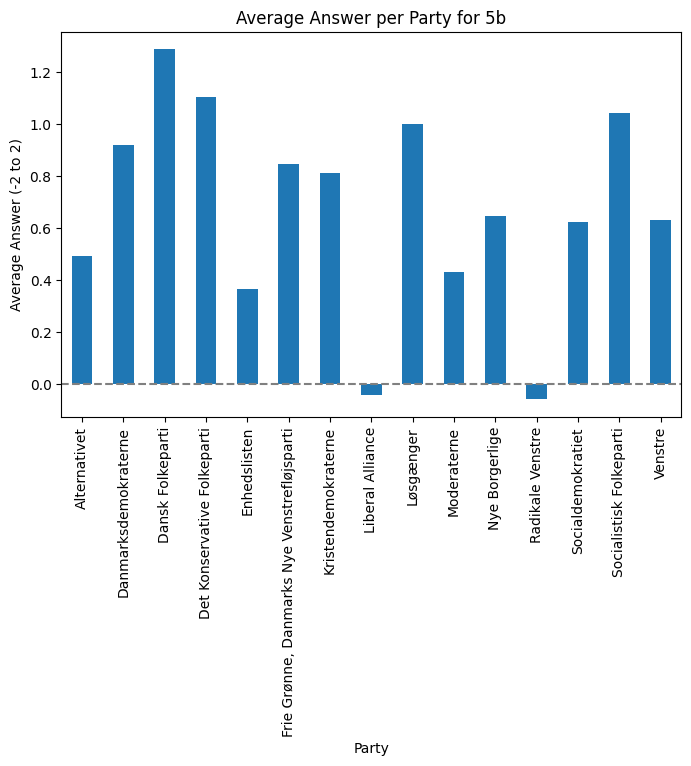

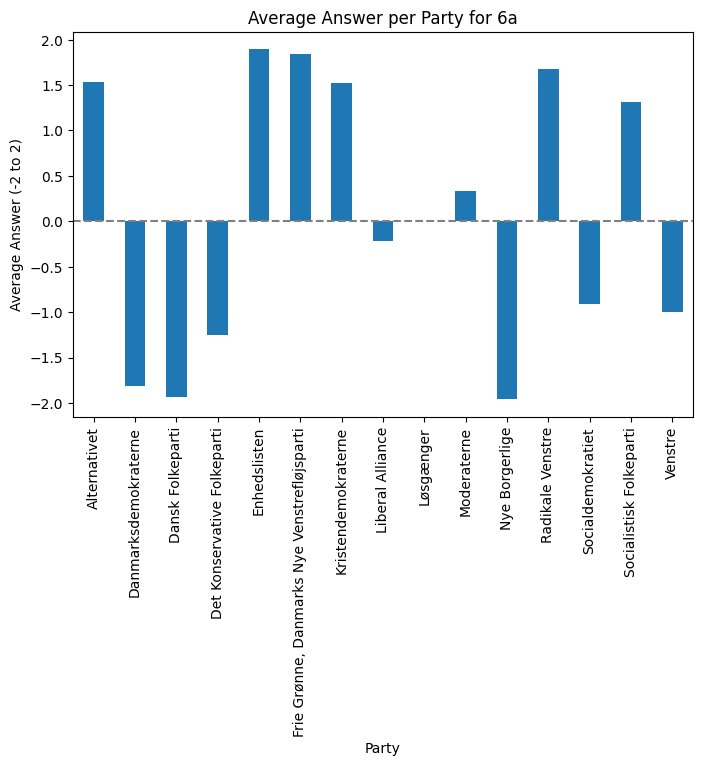

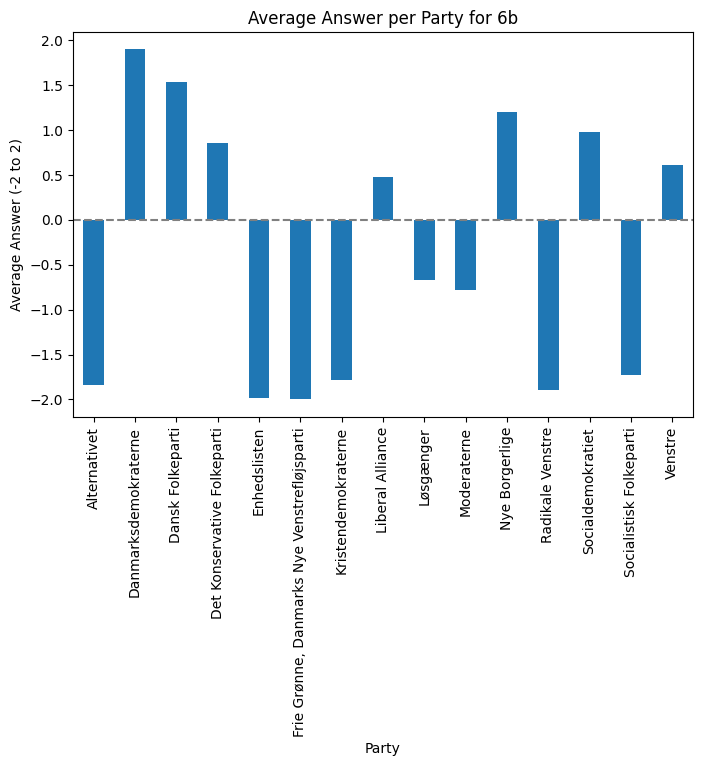

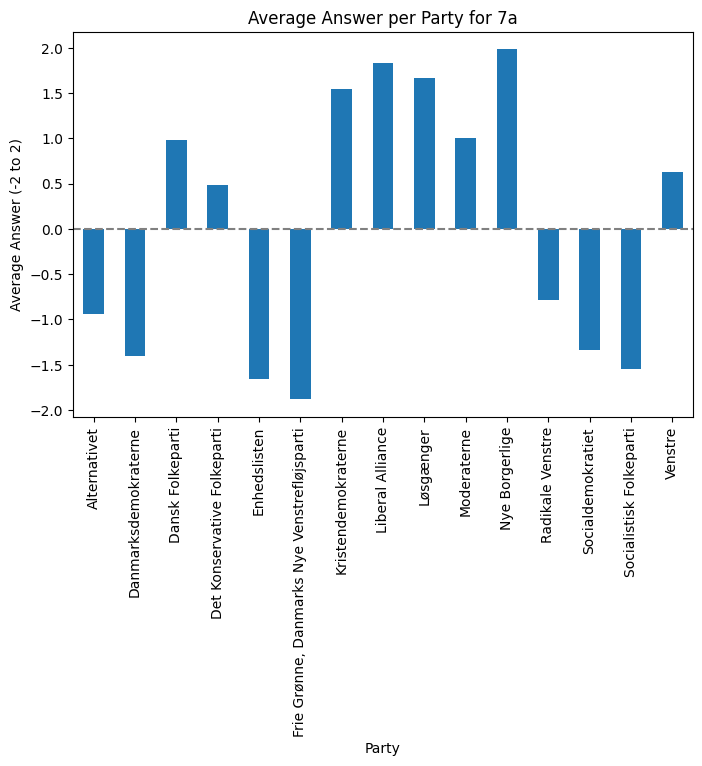

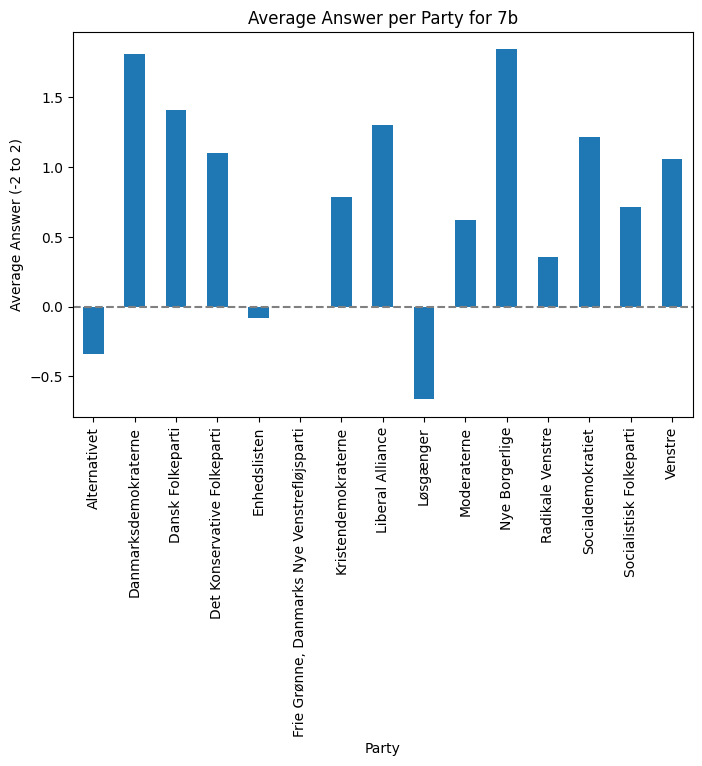

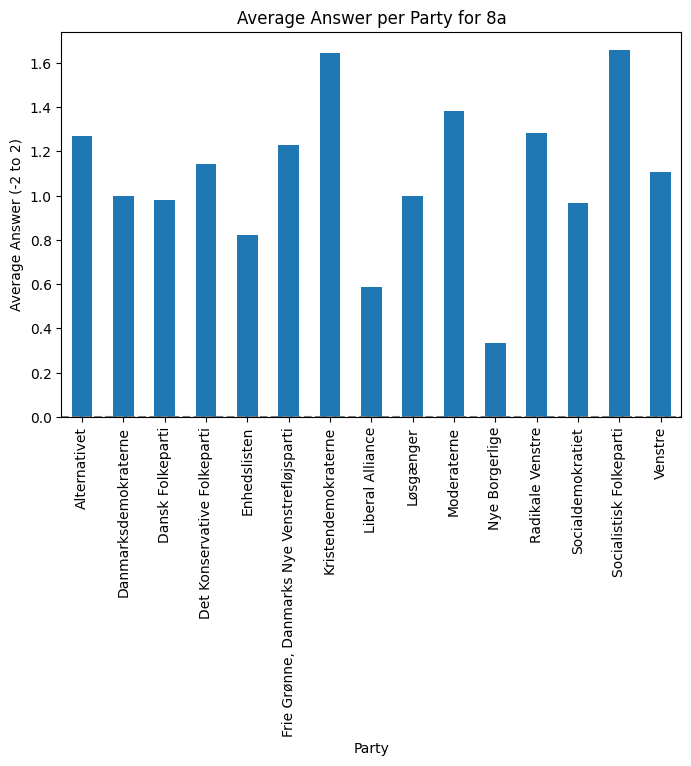

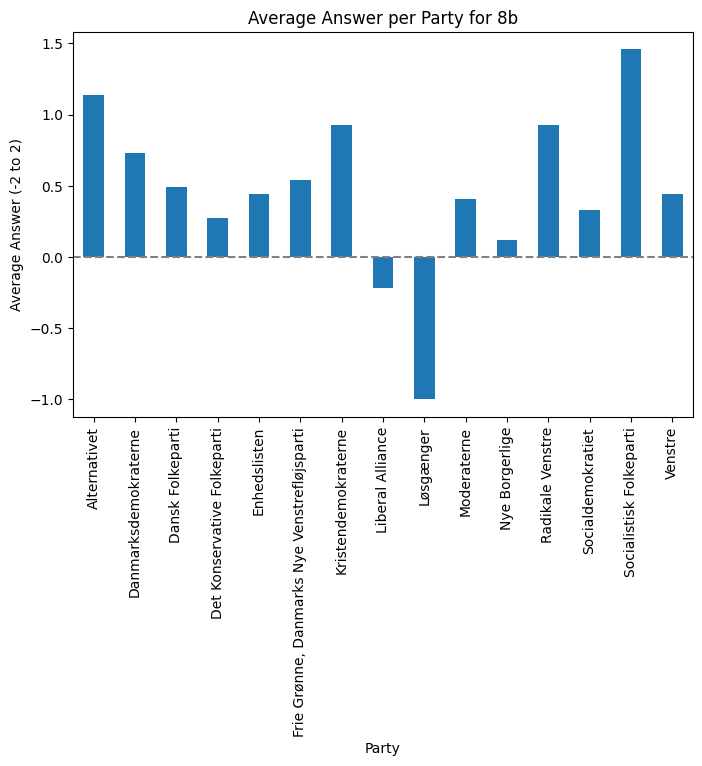

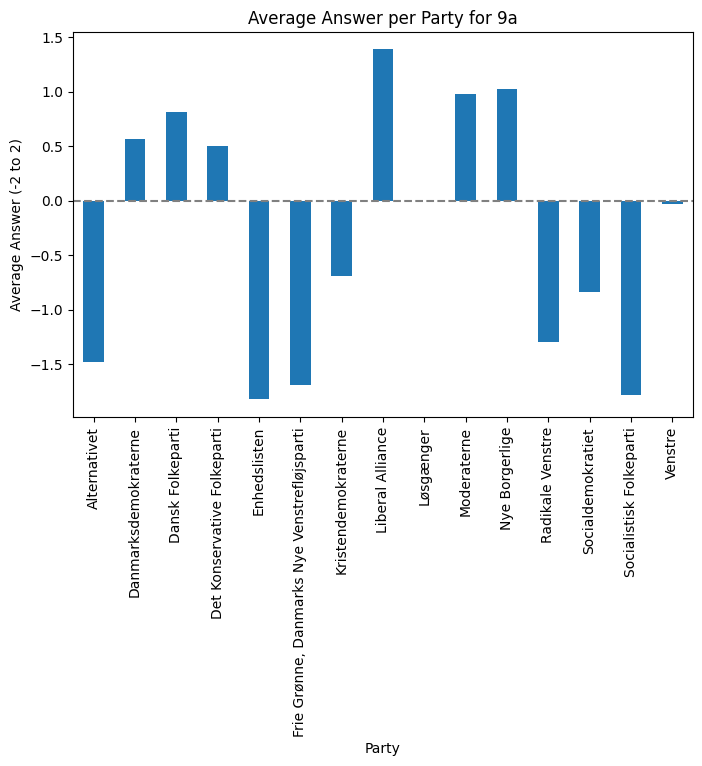

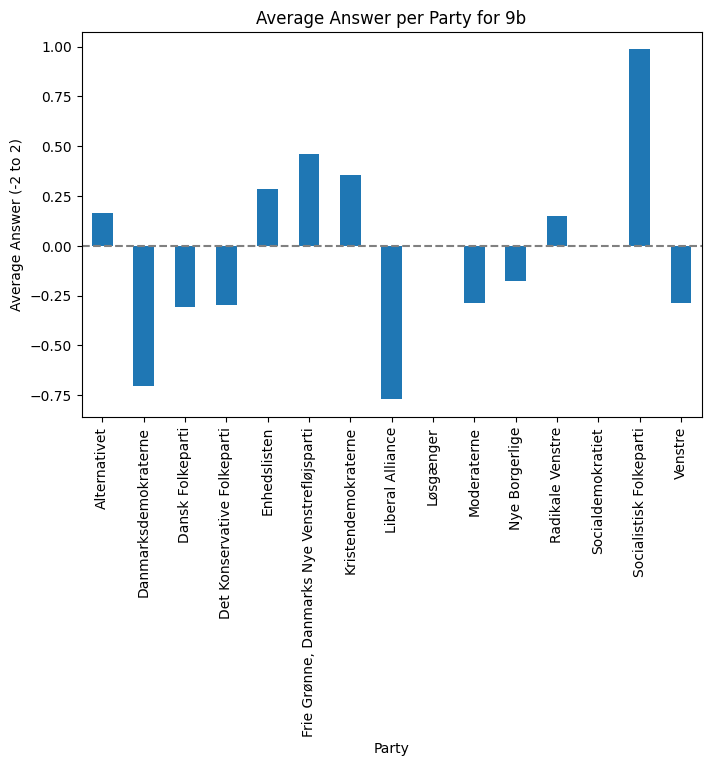

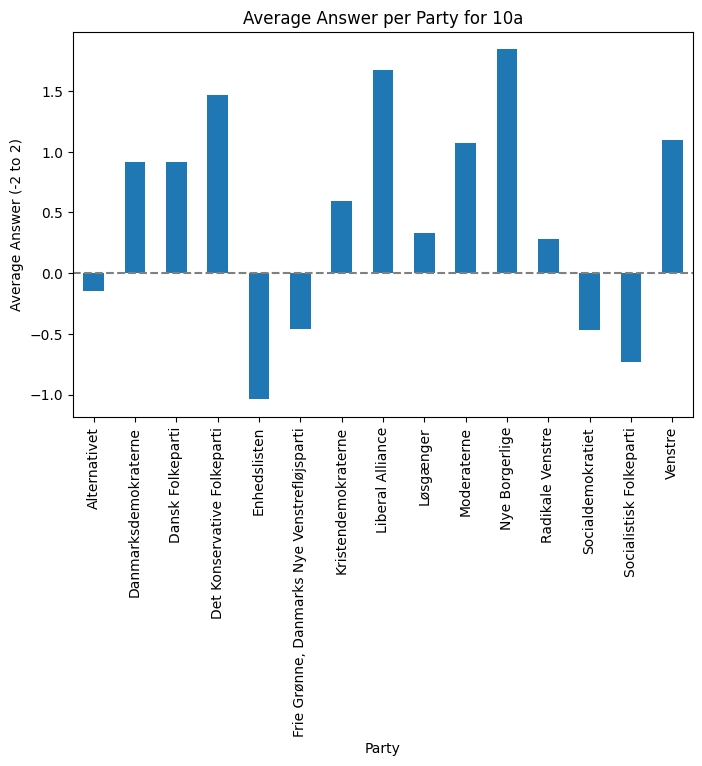

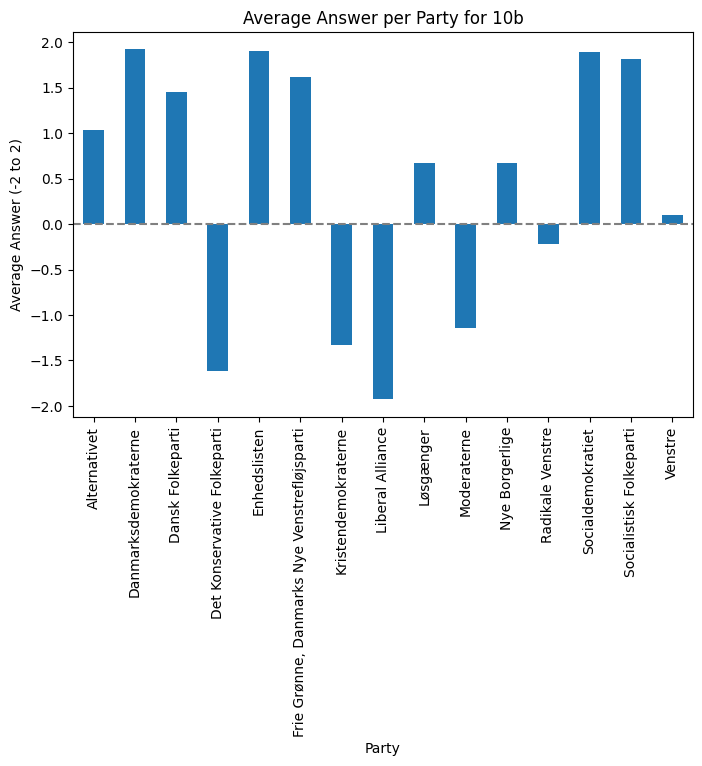

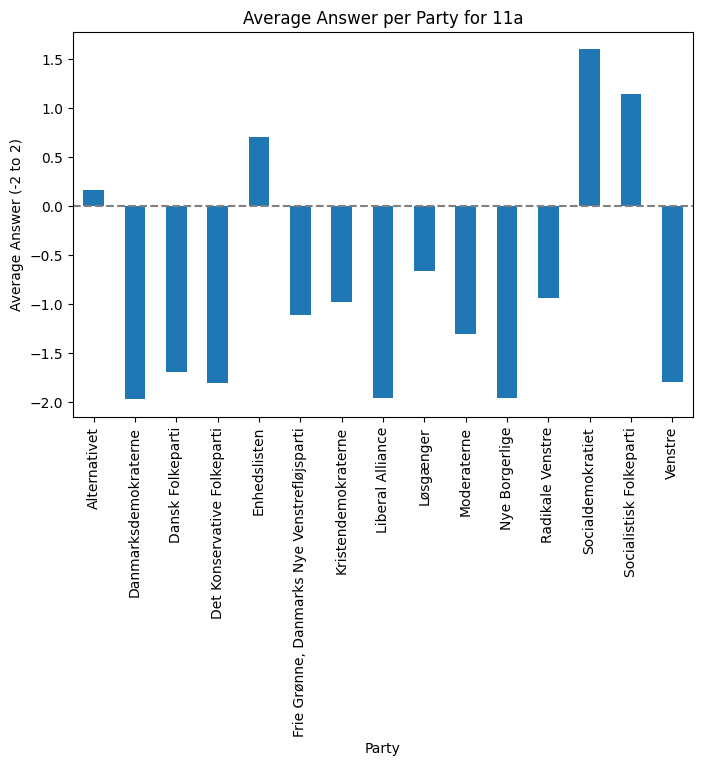

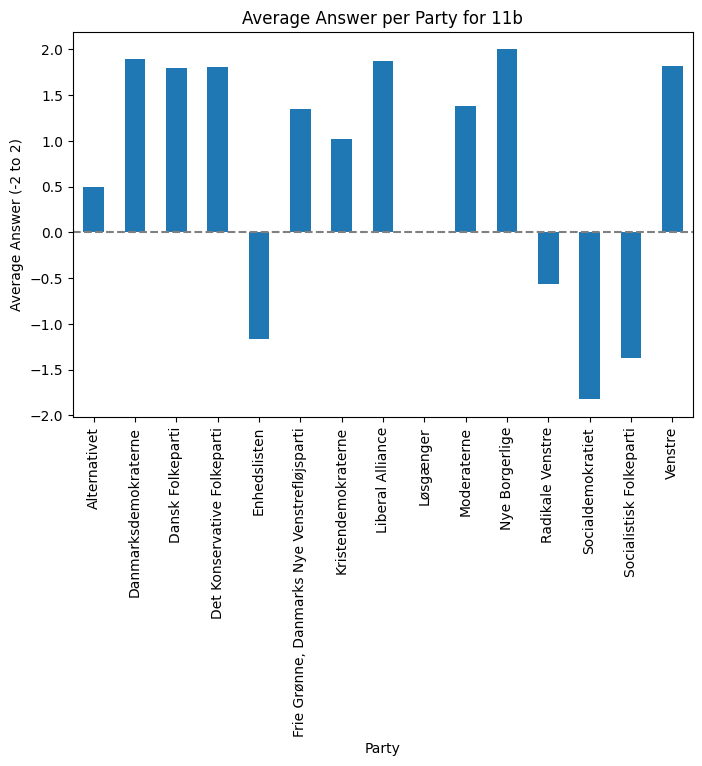

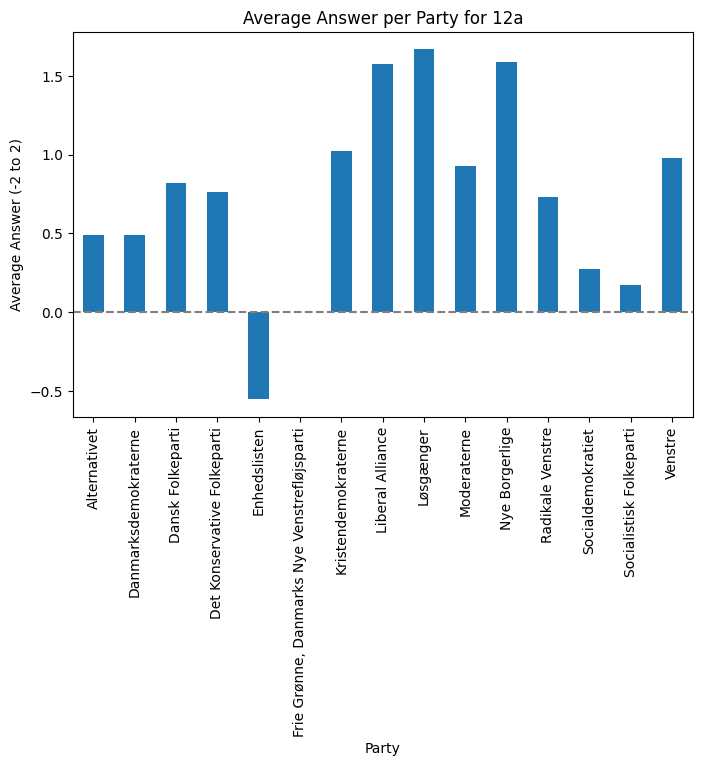

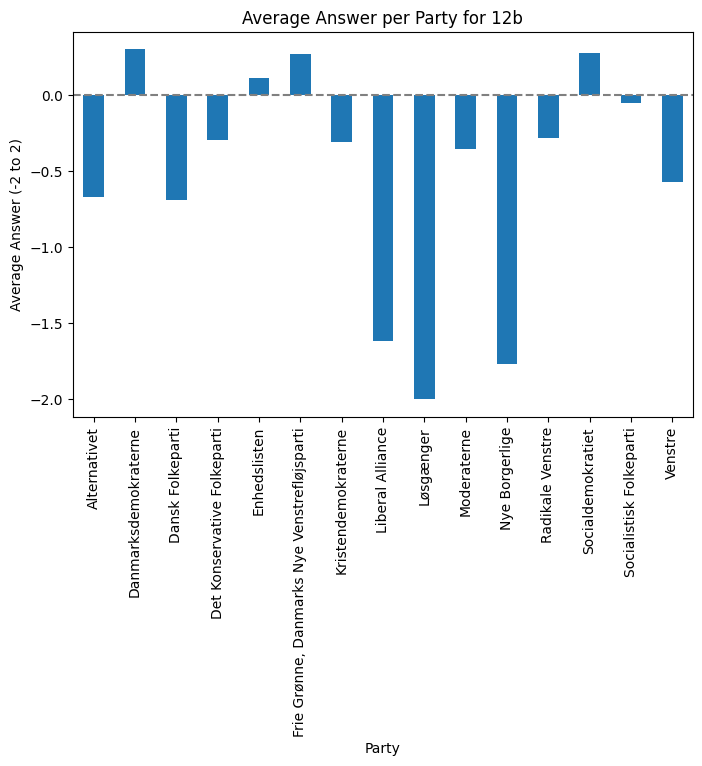

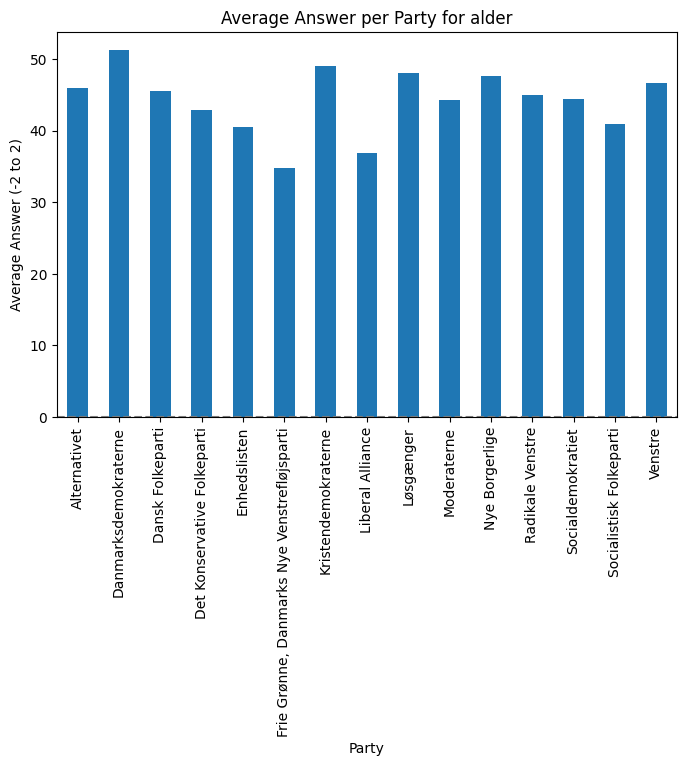

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('alldata.xlsx')
party_column = 'parti'

question_columns = [col for col in df.columns if col not in [party_column, 'Age', 'Gender', 'navn', 'storkreds']]

df[question_columns] = df[question_columns].apply(pd.to_numeric, errors='coerce')

party_means = df.groupby(party_column)[question_columns].mean()

print("Average answers per party:")
print(party_means)

for question in question_columns:
    party_means[question].plot(kind='bar', title=f'Average Answer per Party for {question}',
                               ylabel='Average Answer (-2 to 2)', xlabel='Party', figsize=(8, 5))
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()

#Gets the answeres of each quistion and calculated the average for each party.


## A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**

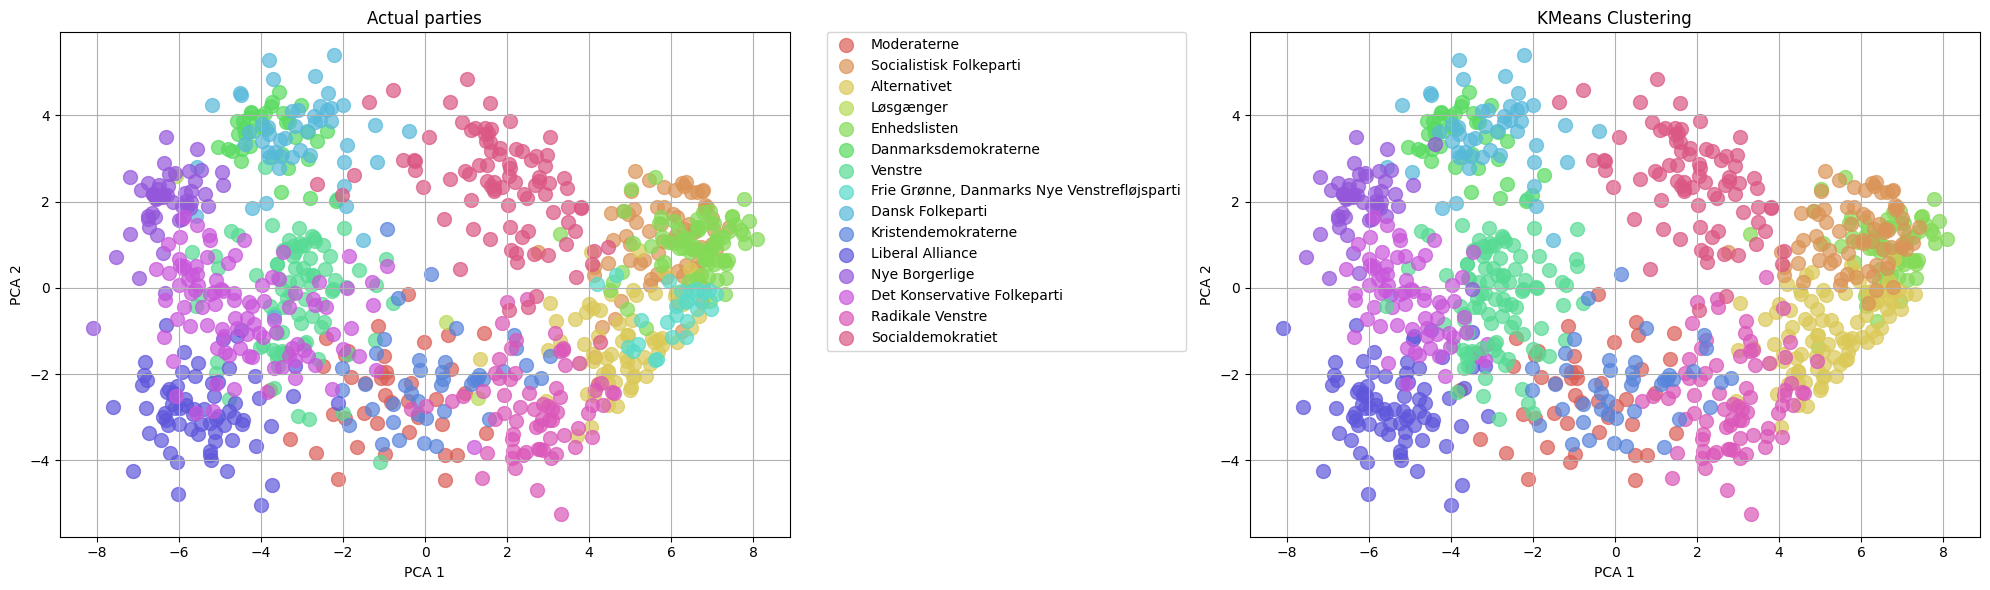

Adjusted Rand Index (ARI): 0.704
Normalized Mutual Information (NMI): 0.800


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import seaborn as sns

df = pd.read_excel("alldata.xlsx")

exclude_columns = ['navn', 'parti', 'storkreds', 'alder']
question_columns = [col for col in df.columns if col not in exclude_columns]
X = df[question_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cluster = KMeans(
    random_state=42,
    n_clusters=14,
    n_init=10,
    init='k-means++'
)
y_prime = cluster.fit_predict(X_scaled)
df['Cluster'] = y_prime

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

unique_parties = df['parti'].unique()
palette = sns.color_palette("hls", len(unique_parties))
party_color_map = {parti: palette[i] for i, parti in enumerate(unique_parties)}

cluster_party_map = (
    df.groupby('Cluster')['parti']
    .agg(lambda x: x.value_counts().index[0]) 
    .to_dict()
)
cluster_color_map = {
    cluster: party_color_map[party] for cluster, party in cluster_party_map.items()
}

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
for parti in unique_parties:
    subset = df[df['parti'] == parti]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=parti,
                color=party_color_map[parti], s=100, alpha=0.7)
plt.title("Actual parties")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

# Plot B: KMeans Clusters with matched colors
plt.subplot(1, 2, 2)
for cluster_id in df['Cluster'].unique():
    subset = df[df['Cluster'] == cluster_id]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f"Cluster {cluster_id}",
                color=cluster_color_map[cluster_id], s=100, alpha=0.7)
plt.title("KMeans Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)

plt.tight_layout()
plt.show()

ari = adjusted_rand_score(df['parti'], df['Cluster']) #Tells us how well the clustering matches the actual party labels.
nmi = normalized_mutual_info_score(df['parti'], df['Cluster']) #Tells us how well knowing one set of lables helps predict the other set.
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

#Here we have made the clustering with 14 centroids to mach the parties.

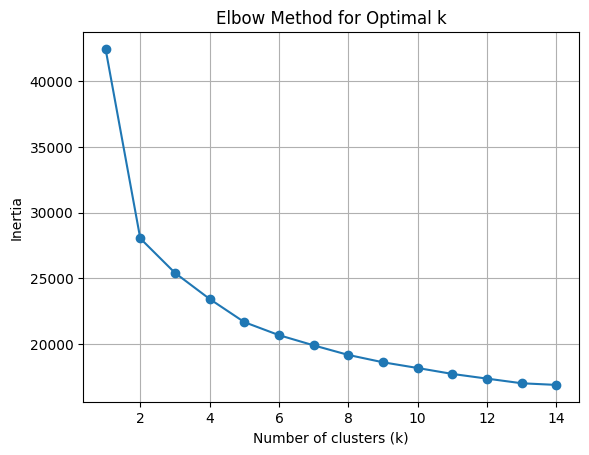

In [ ]:
inertias = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

#Here we have plotted it into a graph to see the elbow point, which is the point where the inertia starts to decrease at a slower rate. This is the optimal number of clusters.
#Inertia is the average squared distance from the centroid to each points in the plot.

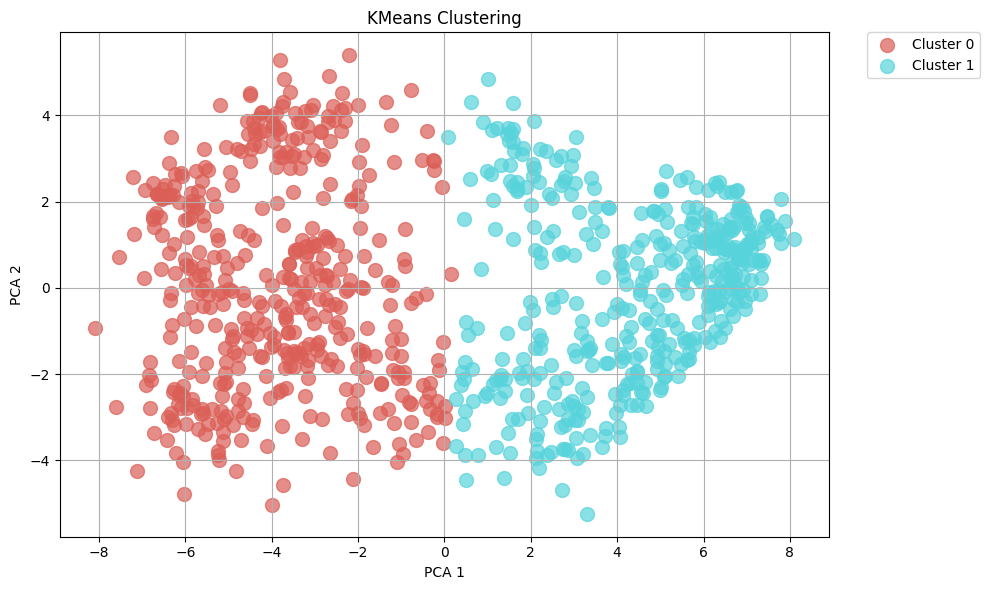

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.read_excel("alldata.xlsx")

exclude_columns = ['navn', 'parti', 'storkreds', 'alder']
question_columns = [col for col in df.columns if col not in exclude_columns]
X = df[question_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cluster = KMeans(
    random_state=42,
    n_clusters=2,
    n_init=10,
    init='k-means++'
)
y_prime = cluster.fit_predict(X_scaled)
df['Cluster'] = y_prime

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

num_clusters = df['Cluster'].nunique()
palette = sns.color_palette("hls", num_clusters)
cluster_color_map = {cluster_id: palette[i] for i, cluster_id in enumerate(sorted(df['Cluster'].unique()))}

plt.figure(figsize=(10, 6))
for cluster_id in sorted(df['Cluster'].unique()):
    subset = df[df['Cluster'] == cluster_id]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f"Cluster {cluster_id}",
                color=cluster_color_map[cluster_id], s=100, alpha=0.7)
plt.title("KMeans Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

#Here we have made the clustering with 2 centroids using the elbow point.

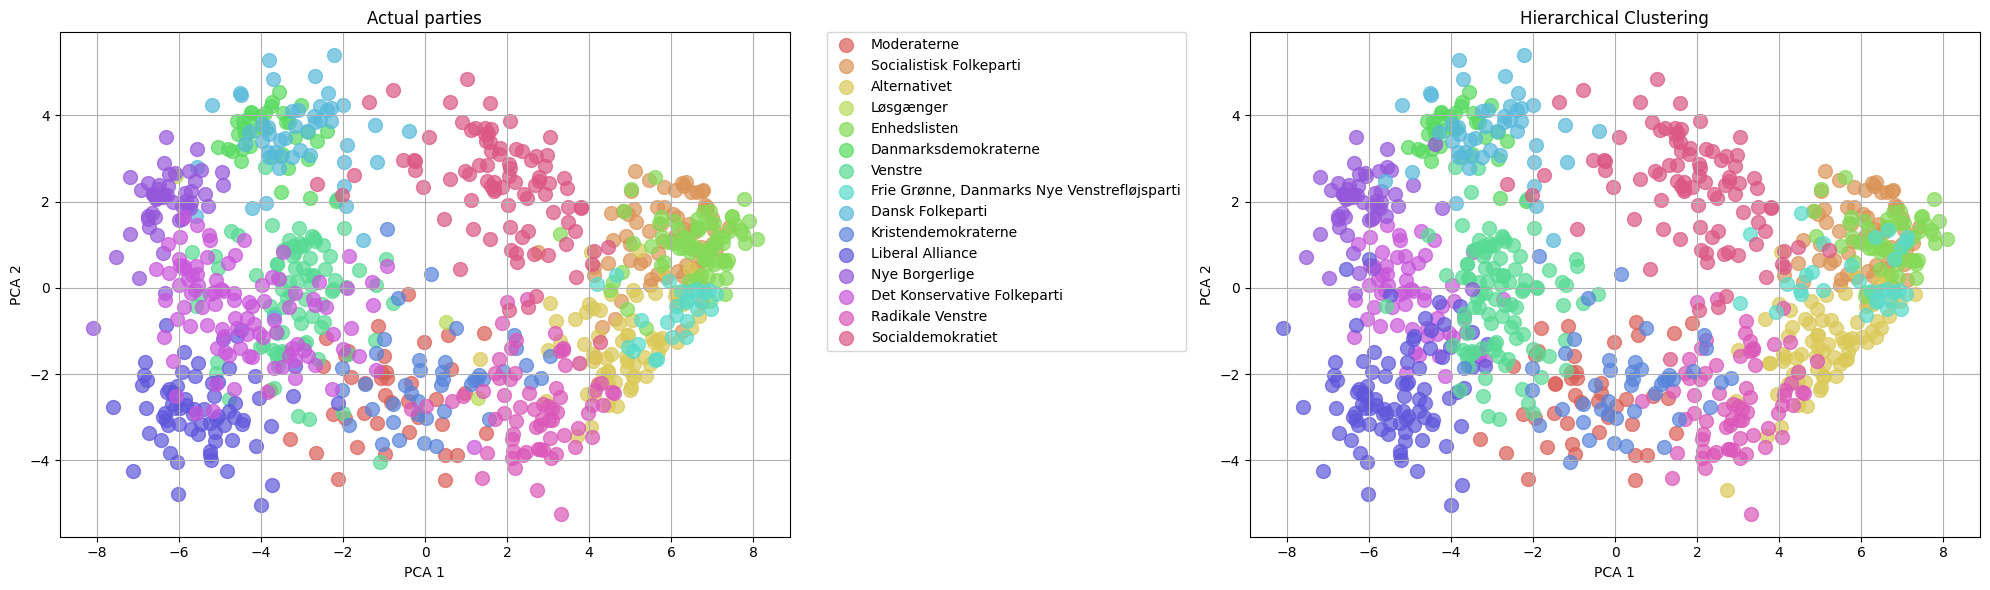

Adjusted Rand Index (ARI): 0.664
Normalized Mutual Information (NMI): 0.770


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

df = pd.read_excel("alldata.xlsx")

exclude_columns = ['navn', 'parti', 'storkreds', 'alder']
question_columns = [col for col in df.columns if col not in exclude_columns]
X = df[question_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cluster = AgglomerativeClustering(n_clusters=14, linkage='ward')
y_prime = cluster.fit_predict(X_scaled)
df['Cluster'] = y_prime

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

unique_parties = df['parti'].unique()
palette = sns.color_palette("hls", len(unique_parties))
party_color_map = {parti: palette[i] for i, parti in enumerate(unique_parties)}

cluster_party_map = (
    df.groupby('Cluster')['parti']
    .agg(lambda x: x.value_counts().index[0])
    .to_dict()
)
cluster_color_map = {
    cluster: party_color_map[party] for cluster, party in cluster_party_map.items()
}

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
for parti in unique_parties:
    subset = df[df['parti'] == parti]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=parti,
                color=party_color_map[parti], s=100, alpha=0.7)
plt.title("Actual parties")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

plt.subplot(1, 2, 2)
for cluster_id in df['Cluster'].unique():
    subset = df[df['Cluster'] == cluster_id]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f"Cluster {cluster_id}",
                color=cluster_color_map[cluster_id], s=100, alpha=0.7)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)

plt.tight_layout()
plt.show()

ari = adjusted_rand_score(df['parti'], df['Cluster']) #Tells us how well the clustering matches the actual party labels.
nmi = normalized_mutual_info_score(df['parti'], df['Cluster']) #Tells us how well knowing one set of lables helps predict the other set.
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

#Here we have made the 14 clusteres to mach the amount of actual parties.

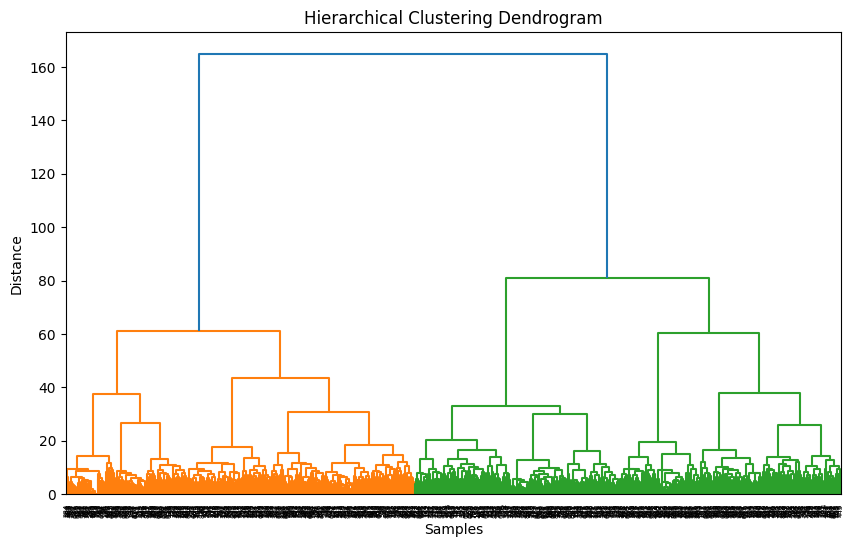

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, ward

df = pd.read_excel("alldata.xlsx")

exclude_columns = ['navn', 'parti', 'storkreds', 'alder']
question_columns = [col for col in df.columns if col not in exclude_columns]
X = df[question_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linkage_array = ward(X_scaled)

plt.figure(figsize=(10, 6))
dendrogram(linkage_array)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

#We make the dendrogram and can then see where the distances begin to be larger and use it to find the optimal number of clusters.

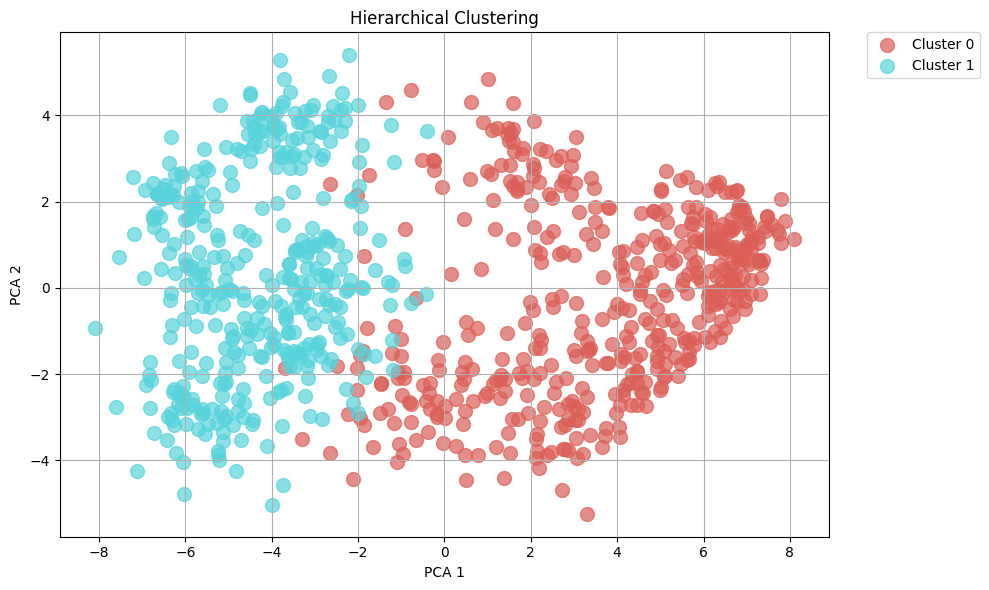

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

df = pd.read_excel("alldata.xlsx")

exclude_columns = ['navn', 'parti', 'storkreds', 'alder']
question_columns = [col for col in df.columns if col not in exclude_columns]
X = df[question_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_prime = cluster.fit_predict(X_scaled)
df['Cluster'] = y_prime

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

num_clusters = df['Cluster'].nunique()
palette = sns.color_palette("hls", num_clusters)
cluster_color_map = {cluster_id: palette[i] for i, cluster_id in enumerate(sorted(df['Cluster'].unique()))}

plt.figure(figsize=(10, 6))
for cluster_id in sorted(df['Cluster'].unique()):
    subset = df[df['Cluster'] == cluster_id]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f"Cluster {cluster_id}",
                color=cluster_color_map[cluster_id], s=100, alpha=0.7)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

#Here we have 2 clusters based on the dendrogram, but one could also argue for 3 or maybe 5 clusters being optimal.

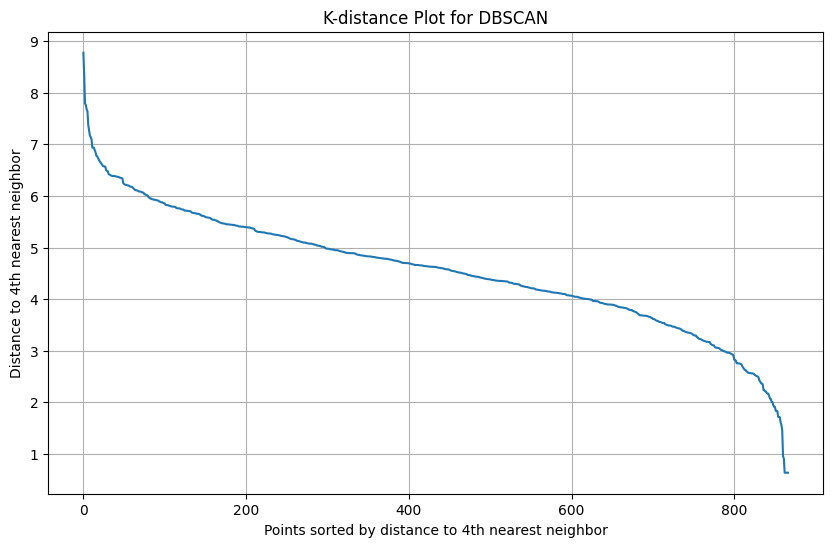

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_excel("alldata.xlsx")

exclude_columns = ['navn', 'parti', 'storkreds', 'alder']
question_columns = [col for col in df.columns if col not in exclude_columns]
X = df[question_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def init_nth_lowest(n):
    return np.full(n, np.inf).tolist()

def add_to_nth_lowest(lowest, value):
    lowest.append(value)
    lowest.sort()
    lowest.pop()

def nth_lowest_distance(n, point, points):
    lowest = init_nth_lowest(n)
    for p in points:
        distance = np.linalg.norm(point - p)
        add_to_nth_lowest(lowest, distance)
    return lowest[-1]

def nth_lowest_distances(n, points):
    return [nth_lowest_distance(n, point, points) for point in points]

# Calculate the 4th nearest neighbor distances (min_samples is often set between to 3 to 5 in DBSCAN when 2D)
distances = nth_lowest_distances(4, X_scaled)

distances.sort(reverse=True)

plt.figure(figsize=(10, 6))
plt.plot(range(len(distances)), distances)
plt.title("K-distance Plot for DBSCAN")
plt.xlabel("Points sorted by distance to 4th nearest neighbor")
plt.ylabel("Distance to 4th nearest neighbor")
plt.grid(True)
plt.show()

#Here we have plotted the distances to the 4th nearest neighbor, so that we can find the elbow point which gives a optimal value for eps in DBSCAN.
#Two curves or a sideways "s" shape suggests that there are multiple density levels.

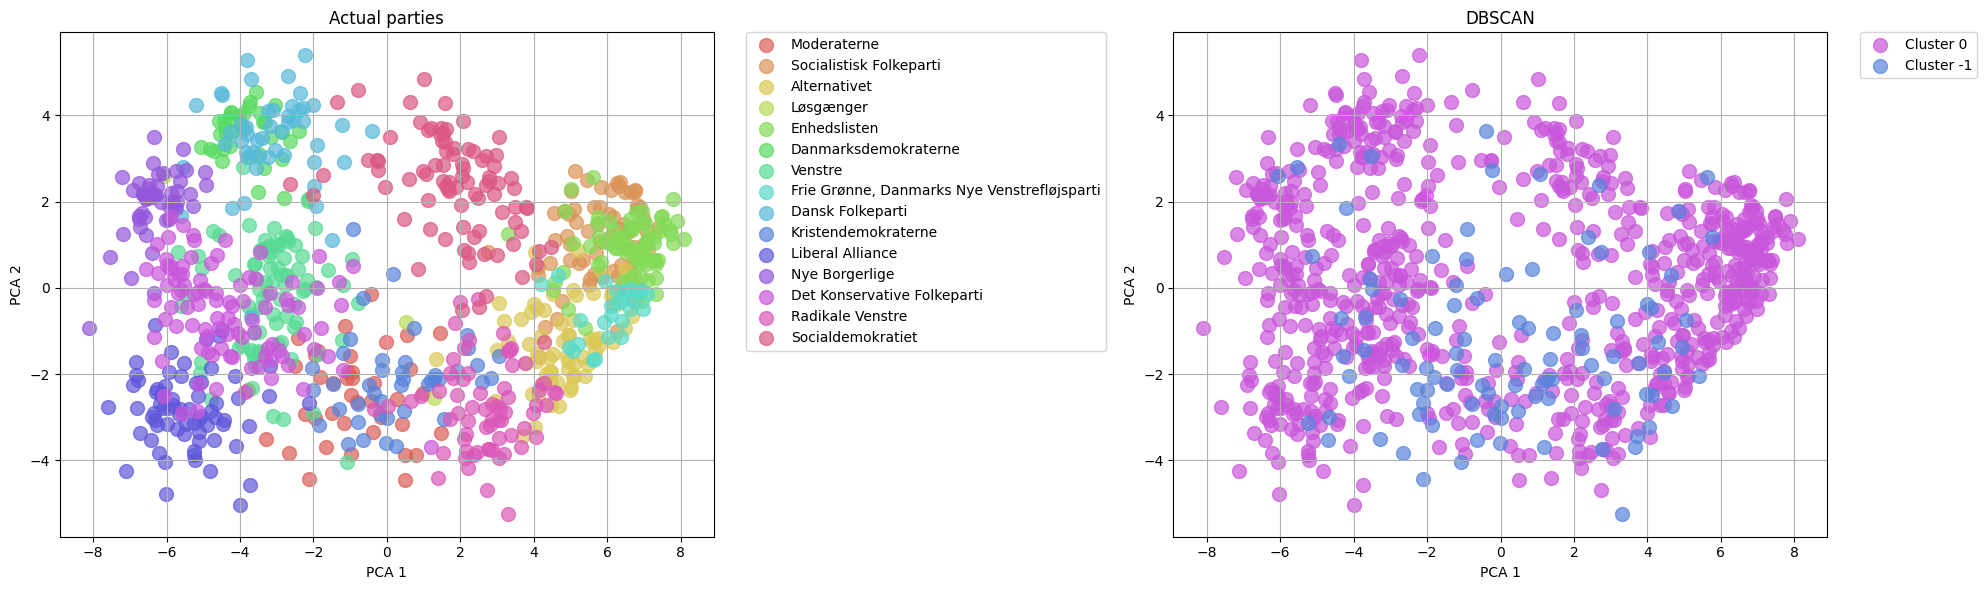

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import seaborn as sns

df = pd.read_excel("alldata.xlsx")

exclude_columns = ['navn', 'parti', 'storkreds', 'alder']
question_columns = [col for col in df.columns if col not in exclude_columns]
X = df[question_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=5.5, min_samples=4)  
y_prime = dbscan.fit_predict(X_scaled)
df['Cluster'] = y_prime #cluster -1 in noise

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

unique_parties = df['parti'].unique()
palette = sns.color_palette("hls", len(unique_parties))
party_color_map = {parti: palette[i] for i, parti in enumerate(unique_parties)}

cluster_party_map = (
    df.groupby('Cluster')['parti']
    .agg(lambda x: x.value_counts().index[0])
    .to_dict()
)
cluster_color_map = {
    cluster: party_color_map[party] for cluster, party in cluster_party_map.items()
}

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
for parti in unique_parties:
    subset = df[df['parti'] == parti]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=parti,
                color=party_color_map[parti], s=100, alpha=0.7)
plt.title("Actual parties")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

plt.subplot(1, 2, 2)
for cluster_id in df['Cluster'].unique():
    subset = df[df['Cluster'] == cluster_id]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f"Cluster {cluster_id}",
                color=cluster_color_map[cluster_id], s=100, alpha=0.7)
plt.title("DBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

plt.tight_layout()
plt.show()

#Based on the elbow point we have set eps to 5.5 and min_samples to 4, but this can be changed based on the data and the clustering you want to achieve.
#Based on the result we can see that DBSCAN does not fit well with our data. This could be because of the complex shape, and DBSCAN struggels when when there are complex bounderies, but is good to find outliers in non-complex shapes, where clusters are compact and well separated.

## An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("alldata.xlsx")

exclude_columns = ['navn', 'parti', 'storkreds', 'alder']
question_columns = [col for col in df.columns if col not in exclude_columns]
X = df[question_columns].copy()
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.median()) 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(pca.components_.T, index=question_columns, columns=["PC1", "PC2"])
important_PC1 = loadings["PC1"].abs().sort_values(ascending=False)
important_PC2 = loadings["PC2"].abs().sort_values(ascending=False)

pca_df = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
pca_df["parti"] = df["parti"]
pca_df["navn"] = df["navn"].str.strip()

#Cosine similarity between politicians
similarity_matrix = cosine_similarity(X_scaled)
similarity_df = pd.DataFrame(similarity_matrix, index=df['navn'].str.strip(), columns=df['navn'].str.strip())  # Strip spaces in names

#Removes semilarities with themselves.
similarity_df_no_diag = similarity_df.copy() 
for i in similarity_df_no_diag.index:
    similarity_df_no_diag.loc[i, i] = None

stacked = similarity_df_no_diag.stack() #for ease

# Remove duplicates by keeping only unique pairs (unordered) (A, B) and (B, A).
stacked_unique = stacked[stacked.index.get_level_values(0) < stacked.index.get_level_values(1)]

stacked_sorted = stacked_unique.sort_values()

print("\nMost Disagreement Between Politicians:")
print(stacked_sorted.head(10))

print("\nMost Agreement Between Politicians:")
print(stacked_sorted[::-1].head(10))

#Here is shown the most agreement and disagreement between the politicians based on the cosine similarity of their answers to the questions.


Most Disagreement Between Politicians:
navn               navn             
Carsten Andersen   Søren Lahn Sloth    -0.854755
Alex Vanopslagh    Melina Andersen     -0.849328
Frederik Grünfeld  Selma Bolø          -0.846838
Anders Kirkeby     Melina Andersen     -0.845165
Ole Birk Olesen    Rasmus Henriksen    -0.845139
Signe Munk         Tobias Pagh         -0.844777
Carsten Andersen   Selma Bolø          -0.844550
Carl Andersen      Stine Ry Andersen   -0.843169
Signe Munk         Svend Stein Olsen   -0.840351
Michel Thrysøe     Signe Munk          -0.840349
dtype: float64

Most Agreement Between Politicians:
navn                     navn                   
Brian Nielsen            Jan Bigum Warming          1.000000
                         Pernille Vermund           1.000000
Jan Bigum Warming        Pernille Vermund           1.000000
Peter Seier Christensen  Ulla Kokfelt               1.000000
Pernille Vermund         Ulla Kokfelt               0.996861
Brian Nielsen            Ul